In [63]:
# pip install lightgbm
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sb
from random import randint
from scipy import stats
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt # two variation 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, XGBRegressor
from sklearn.neural_network import MLPRegressor, MLPClassifier
import xgboost
import shap
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from ngboost import NGBoost
from ngboost.ngboost import NGBoost as NGBoostRegressor
from ngboost.distns import Normal
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.inspection import permutation_importance
import warnings # Ignore all warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import ADASYN
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LinearRegression
from scipy.stats import pointbiserialr, spearmanr, kurtosis, skew
from sklearn.preprocessing import PolynomialFeatures
from imblearn.combine import SMOTEENN  # Import SMOTE + ENN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek

In [64]:
# Load dataset
bd = pd.read_csv("Wonder_thesis_data.csv")
print('Data Shape:', bd.shape)

# Check for missing values
print('Total Missing Values:', bd.isna().sum().sum())

# Drop unnecessary columns
bd.drop(columns=['ZipCode', 'Municipality', 'Business_Category', 'Size_Category'], inplace=True)
print('Shape after dropping unneeded columns:', bd.shape)

# Fill missing values with column mean
bd.fillna(bd.mean(), inplace=True)
print('Missing values after imputation:', bd.isna().sum().sum())

# Check unique firms
print('Unique companies:', bd['ORGNR'].nunique())
print(bd.duplicated().sum())

Data Shape: (91301, 102)
Total Missing Values: 72946
Shape after dropping unneeded columns: (91301, 98)
Missing values after imputation: 0
Unique companies: 10696
0


In [65]:
bd.head()

ORGNR  Year  Bankrupt  OperatingProfit  Financial_Income  \
0  5560024712  1998         0           -558.0               358   
1  5560024712  1999         0           -634.0               351   
2  5560024712  2000         0           3809.0               230   
3  5560024712  2001         0          -1147.0               233   
4  5560024712  2002         0          -1250.0               241   

   Financial_Expenses  Internal_FinPerformance  Financ_res_Extent  \
0                -379                      348               -369   
1                -395                      348               -392   
2                -280                      229               -279   
3                -227                      200               -194   
4                -218                      194               -171   

   Profit_AfterExp  Taxes  NetProfit  Intangible FxdA  Machinery&Equipment  \
0           -579.0    0.0       -579              0.0                344.0   
1           -679.0    0.0       -679              0.0                258.0   
2           3758.0 -209.0       3259              0.0                195.0   
3          -1140.0    0.0       -850              0.0                167.0   
4          -1226.0    0.0      -1226              0.0                150.0   

   Tangible FxdA  Financial_Assets  Total_FxdA  Total_CurrA  Total_Assets  \
0         5344.0               1.0      5345.0        673.0          6018   
1         5258.0               1.0      5259.0        850.0          6109   
2         5195.0              93.0      5288.0       4228.0          9515   
3         5167.0             108.0      5275.0       2422.0          7697   
4         5150.0              76.0      5226.0        803.0          6029   

   Total_Equity  Untaxed_Reserves  Provisions  Curr_Liabilities  \
0        2049.0                 0           0              85.0   
1        1371.0                 0           0              39.0   
2        4630.0               291           0              43.0   
3        3780.0                 0           0              47.0   
4        2554.0                 0           0              52.0   

   Total_Curr_Liabilities  Non_Curr_Liabilities  Total_Non_curr_lia  \
0                   741.0                3226.0              3226.0   
1                   891.0                3847.0              3847.0   
2                   722.0                3873.0              3873.0   
3                   756.0                3161.0              3161.0   
4                   505.0                2970.0              2970.0   

   Total_Equity&Liab  Net_Sales  Other_Oper_incom  Depreciation  \
0             6018.0       2726              50.0           -96   
1             6109.0       2852              60.0           -86   
2             9515.0       2779            4560.0           -80   
3             7697.0       2631              24.0           -87   
4             6029.0       2415              13.0           -88   

   Personnel_Expenses  Comparability_items  Other_oper_exp  \
0               -1535                    0           -1703   
1               -1818                    0           -1642   
2               -1959                    0           -1491   
3               -1996                    0           -1718   
4               -2089                    0           -1501   

   Total_appropriations  Employees  Sales_per_Employee  VA_per_Employee  \
0                     0          7               389.0            153.0   
1                     0          8               357.0            159.0   
2                  -290          8               347.0            731.0   
3                   290          8               329.0            117.0   
4                     0          8               302.0            116.0   

   Change_in_Sales  Inventory  Salaries  Value_Added  Social_Security  \
0         0.801514      513.0   -1138.0         1073           -397.0   
1         0.046222      727.0   -1345.0         1

In [66]:
bd.describe()

ORGNR          Year      Bankrupt  OperatingProfit  \
count  9.130100e+04  91301.000000  91301.000000     91301.000000   
mean   5.565178e+09   2007.711876      0.003669       124.344578   
std    1.549052e+06      6.280128      0.060463       680.581722   
min    5.560025e+09   1998.000000      0.000000    -33519.000000   
25%    5.564341e+09   2003.000000      0.000000       -47.000000   
50%    5.565522e+09   2007.000000      0.000000        33.000000   
75%    5.566355e+09   2012.000000      0.000000       178.000000   
max    5.567417e+09   2021.000000      1.000000     32674.000000   

       Financial_Income  Financial_Expenses  Internal_FinPerformance  \
count      91301.000000        91301.000000             91301.000000   
mean          24.351300          -37.367564                10.585547   
std          327.087727          130.475604               329.902211   
min            0.000000       -11324.000000            -11311.000000   
25%            0.000000          -32.000000                 0.000000   
50%            0.000000           -8.000000                 0.000000   
75%            2.000000           -1.000000                 0.000000   
max        31288.000000           13.000000             31102.000000   

       Financ_res_Extent  Profit_AfterExp         Taxes     NetProfit  \
count       91301.000000     91301.000000  91301.000000  91301.000000   
mean          -23.609479       111.370179    -35.874993     67.126165   
std            99.023394       755.773290    119.675502    599.547782   
min         -5429.000000    -34454.000000  -4988.000000 -23620.000000   
25%           -26.000000       -61.000000    -26.000000    -41.000000   
50%            -5.000000        18.000000      0.000000     14.000000   
75%             0.000000       158.000000      0.000000    113.000000   
max          9106.000000     45529.000000    942.000000  31046.000000   

       Intangible FxdA  Machinery&Equipment  Tangible FxdA  Financial_Assets  \
count     91301.000000         91301.000000   91301.000000      91301.000000   
mean         90.355153           332.470224     631.553799        122.840853   
std         417.246959          1383.642984    2497.375404        867.018449   
min          -6.000000          -875.000000    -875.000000       -431.000000   
25%           0.000000            17.000000      24.000000          0.000000   
50%           0.000000            93.000000     137.000000          0.000000   
75%           0.000000           291.000000     463.000000          1.000000   
max       25050.000000        110814.000000  147901.000000      67841.000000   

          Total_FxdA    Total_CurrA   Total_Assets  Total_Equity  \
count   91301.000000   91301.000000   91301.000000  91301.000000   
mean      844.739717     873.600583    1718.533948    421.429783   
std      2795.629596    1697.306760    3773.196690   1430.273685   
min      -428.000000   -1375.000000       1.000000 -27316.000000   
25%        47.000000     201.000000     406.000000     75.000000   
50%       233.000000     434.000000     839.000000    166.000000   
75%       731.000000     932.000000    1759.000000    439.000000   
max    165218.000000  101929.000000  203508.000000  70481.000000   

       Untaxed_Reserves    Provisions  Curr_Liabilities  \
count      91301.000000  91301.000000      91301.000000   
mean         128.280457      4.242878         38.032501   
std          641.667921     75.600697        273.473114   
min         -300.000000    -57.000000       -396.000000   
25%            0.000000      0.000000          0.000000   
50%            0.000000      0.000000          0.000000   
75%           60.000000      0.000000          0.000000   
max        65802.000000   7124.000000      17557.000000   

       Total_Curr_Liabilities  Non_Curr_Liabilities  Total_Non_curr_lia  \
count            91301.000000          91301.000000        91301.000000   
mean               722.990252            256.857655          441.608226   
std

In [67]:
# Datatype of columns
print("\nDatatype of Features :")
print(bd.dtypes.value_counts())


Datatype of Features :
float64    67
int64      31
Name: count, dtype: int64


In [68]:
bd.isnull().sum()

ORGNR               0
Year                0
Bankrupt            0
OperatingProfit     0
Financial_Income    0
                   ..
WC_to_Sales         0
Quick_ratio         0
Operating_Margin    0
Net_Margin          0
Profit_Margin       0
Length: 98, dtype: int64

In [69]:
bd.duplicated().sum()

0

In [70]:
bd.columns.str.strip()

Index(['ORGNR', 'Year', 'Bankrupt', 'OperatingProfit', 'Financial_Income',
       'Financial_Expenses', 'Internal_FinPerformance', 'Financ_res_Extent',
       'Profit_AfterExp', 'Taxes', 'NetProfit', 'Intangible FxdA',
       'Machinery&Equipment', 'Tangible FxdA', 'Financial_Assets',
       'Total_FxdA', 'Total_CurrA', 'Total_Assets', 'Total_Equity',
       'Untaxed_Reserves', 'Provisions', 'Curr_Liabilities',
       'Total_Curr_Liabilities', 'Non_Curr_Liabilities', 'Total_Non_curr_lia',
       'Total_Equity&Liab', 'Net_Sales', 'Other_Oper_incom', 'Depreciation',
       'Personnel_Expenses', 'Comparability_items', 'Other_oper_exp',
       'Total_appropriations', 'Employees', 'Sales_per_Employee',
       'VA_per_Employee', 'Change_in_Sales', 'Inventory', 'Salaries',
       'Value_Added', 'Social_Security', 'Total_Inventories',
       'Total_receivables', 'Securities_Investments', 'CashnBank', 'Dividend',
       'Production_Costs', 'rr08d_resand', 'rr08a_rteinknc', 'rr08b_rteinext',
   

In [71]:
bd['Bankrupt'].value_counts().reset_index(name='count')

Bankrupt  count
0         0  90966
1         1    335

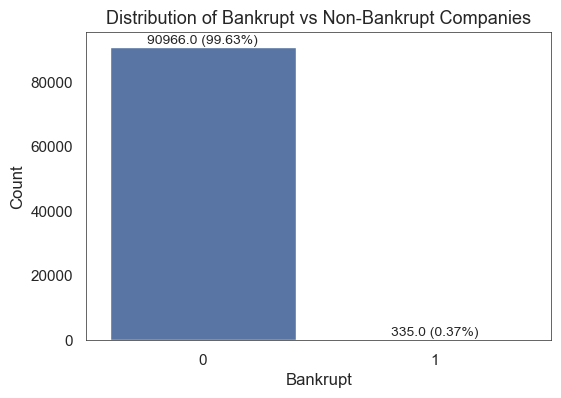

In [72]:
# Set the theme without grid lines
plt.figure(figsize=(6, 4))
sb.set_theme(style="white")  # 'white' style removes the gridlines

# Create the count plot
ax = sb.countplot(x='Bankrupt', data=bd)

# Calculate the total and annotate with counts and percentages
total = len(bd)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height} ({height / total:.2%})', 
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

# Reduce the border width (spines)
for spine in ax.spines.values():
    spine.set_linewidth(0.5)  # Reduce the line width

# Titles and labels
plt.title('Distribution of Bankrupt vs Non-Bankrupt Companies', fontsize=13)
plt.xlabel('Bankrupt', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()


In [73]:
pd.set_option('display.max_columns', None)
bd.groupby('Year')['Bankrupt'].value_counts().unstack(fill_value=0).T

Year      1998  1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  \
Bankrupt                                                                     
0         4107  4233  4430  4503  4796  5029  5228  5292  5296  5467  4911   
1            3    23    10     9    22    15    23    23    20    21    41   

Year      2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  \
Bankrupt                                                                     
0         4455  4042  3706  3423  3184  2952  2707  2514  2340  2223  2099   
1           29    23     9    11     3     7     8     6     8     5     4   

Year      2020  2021  
Bankrupt              
0         2020  2009  
1            8     4

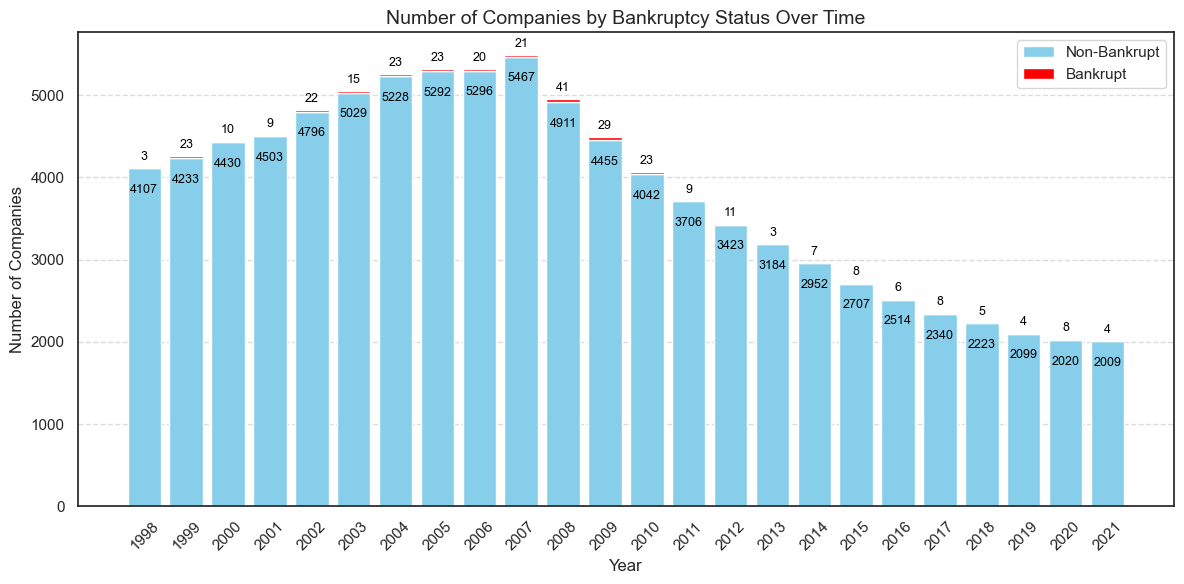

In [74]:
# Data dictionary

data = {
    'Year': [1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    'Non_Bankrupt': [4107, 4233, 4430, 4503, 4796, 5029, 5228, 5292, 5296, 5467, 4911, 4455, 4042, 3706, 3423, 3184, 2952, 2707, 2514, 2340, 2223, 2099, 2020, 2009],
    'Bankrupt': [3, 23, 10, 9, 22, 15, 23, 23, 20, 21, 41, 29, 23, 9, 11, 3, 7, 8, 6, 8, 5, 4, 8, 4]
}

# Create DataFrame
df = pd.DataFrame(data)

# Stacked bar plot with counts
plt.figure(figsize=(12, 6))
bars_non_bankrupt = plt.bar(df["Year"], df["Non_Bankrupt"], label="Non-Bankrupt", color="skyblue")
bars_bankrupt = plt.bar(df["Year"], df["Bankrupt"], bottom=df["Non_Bankrupt"], label="Bankrupt", color="red")

# Annotating the bars
for bar in bars_non_bankrupt:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height - 300, f"{int(height)}", ha='center', fontsize=9, color="black")  # Increased gap

for bar, non_bankrupt in zip(bars_bankrupt, df["Non_Bankrupt"]):
    height = bar.get_height()
    total = height + non_bankrupt
    plt.text(bar.get_x() + bar.get_width() / 2.0, total + 100, f"{int(height)}", ha='center', fontsize=9, color="black")  # Increased gap

# Title and labels
plt.title("Number of Companies by Bankruptcy Status Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Companies", fontsize=12)
plt.xticks(ticks=df["Year"], labels=df["Year"], rotation=45)  # Ensure all years are displayed
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [75]:
bd.groupby('ORGNR')['Bankrupt'].value_counts().unstack(fill_value=0)

Bankrupt     0  1
ORGNR            
5560024712   7  0
5560064403  21  0
5560093576   2  0
5560102369  24  0
5560117029   4  0
...         .. ..
5567412316  11  0
5567412381  15  0
5567412514  15  0
5567413256   7  0
5567417315   7  0

[10696 rows x 2 columns]

In [76]:
# Group by ORGNR and check for the presence of both 0 and 1
orgnr_bankrupt = bd.groupby('ORGNR')['Bankrupt'].value_counts().unstack(fill_value=0)

# Filter for rows where both 0 and 1 are greater than 0
orgnr_with_both = orgnr_bankrupt[(orgnr_bankrupt[0] > 0) & (orgnr_bankrupt[1] > 0)]

# Display the ORGNRs with both 0 and 1 in Bankrupt
print(orgnr_with_both)

Bankrupt     0  1
ORGNR            
5561268979  15  1
5561430447  10  1
5561487421   3  1
5561534693   5  1
5561576280   7  1
...         .. ..
5567323844   3  1
5567325401   9  1
5567339626   6  1
5567346217   3  1
5567357891  10  1

[327 rows x 2 columns]


In [77]:
# Group by Year and check for the presence of both 0 and 1 in Bankrupt
year_bankrupt = bd.groupby('Year')['Bankrupt'].value_counts().unstack(fill_value=0)

# Filter for rows where both 0 and 1 are greater than 0
year_with_both = year_bankrupt[(year_bankrupt[0] > 0) & (year_bankrupt[1] > 0)]

# Display the Years with both 0 and 1 in Bankrupt
print(year_with_both)


Bankrupt     0   1
Year              
1998      4107   3
1999      4233  23
2000      4430  10
2001      4503   9
2002      4796  22
2003      5029  15
2004      5228  23
2005      5292  23
2006      5296  20
2007      5467  21
2008      4911  41
2009      4455  29
2010      4042  23
2011      3706   9
2012      3423  11
2013      3184   3
2014      2952   7
2015      2707   8
2016      2514   6
2017      2340   8
2018      2223   5
2019      2099   4
2020      2020   8
2021      2009   4


In [78]:
bd["ORGNR"].value_counts()

ORGNR
5564150687    24
5563295822    24
5565545307    24
5561983114    24
5565218137    24
              ..
5565757985     1
5563113892     1
5565759486     1
5563118743     1
5566383674     1
Name: count, Length: 10696, dtype: int64

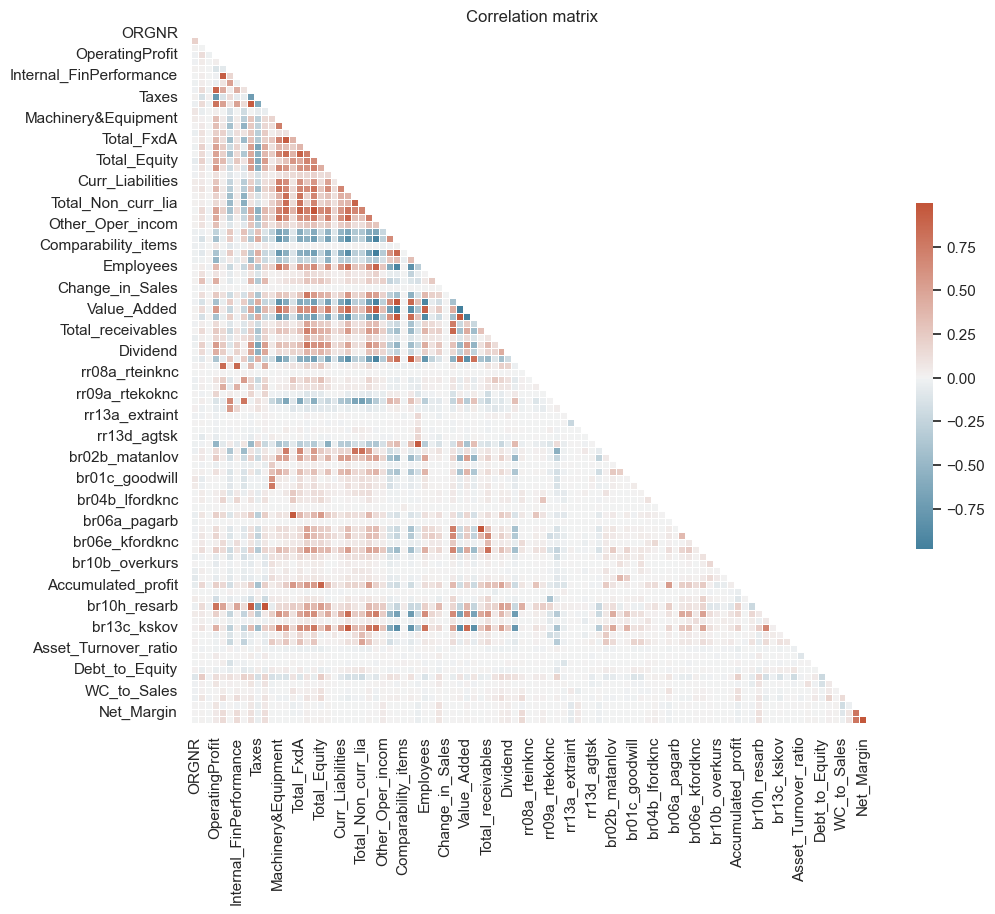

In [79]:
# Compute the correlation matrix
corr = bd.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, center=0,
            linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation matrix")
plt.show()

In [80]:
bd["Year"].value_counts(ascending=False)

Year
2007    5488
2006    5316
2005    5315
2004    5251
2003    5044
2008    4952
2002    4818
2001    4512
2009    4484
2000    4440
1999    4256
1998    4110
2010    4065
2011    3715
2012    3434
2013    3187
2014    2959
2015    2715
2016    2520
2017    2348
2018    2228
2019    2103
2020    2028
2021    2013
Name: count, dtype: int64

In [81]:
# Filter the dataset to include only rows where Year is more than or equal to 2011 for normal economic conditions
bd = bd[bd["Year"] <= 2010]

# Display the value counts for the filtered dataset
print(bd["Year"].value_counts(ascending=False))


Year
2007    5488
2006    5316
2005    5315
2004    5251
2003    5044
2008    4952
2002    4818
2001    4512
2009    4484
2000    4440
1999    4256
1998    4110
2010    4065
Name: count, dtype: int64


In [82]:
bd['Bankrupt'].value_counts().reset_index(name='count')

Bankrupt  count
0         0  61789
1         1    262

In [83]:
bd.describe()

ORGNR          Year      Bankrupt  OperatingProfit  \
count  6.205100e+04  62051.000000  62051.000000     62051.000000   
mean   5.565059e+09   2004.114632      0.004222        61.006581   
std    1.521137e+06      3.597724      0.064843       450.748187   
min    5.560025e+09   1998.000000      0.000000    -10573.000000   
25%    5.564230e+09   2001.000000      0.000000       -58.000000   
50%    5.565414e+09   2004.000000      0.000000        21.000000   
75%    5.566194e+09   2007.000000      0.000000       132.000000   
max    5.567417e+09   2010.000000      1.000000      9894.000000   

       Financial_Income  Financial_Expenses  Internal_FinPerformance  \
count      62051.000000        62051.000000             62051.000000   
mean          15.457769          -38.017470                 3.388986   
std          181.178088          114.099703               186.774644   
min            0.000000        -7201.000000             -7050.000000   
25%            0.000000          -37.000000                 0.000000   
50%            0.000000          -11.000000                 0.000000   
75%            2.000000           -2.000000                 0.000000   
max        20068.000000           13.000000             20065.000000   

       Financ_res_Extent  Profit_AfterExp         Taxes     NetProfit  \
count       62051.000000     62051.000000  62051.000000  62051.000000   
mean          -25.958695        38.505483    -24.450323      9.524504   
std            86.275795       475.261336     83.262551    378.366593   
min         -2733.000000    -11143.000000  -3132.000000 -11143.000000   
25%           -30.000000       -74.000000    -17.000000    -53.000000   
50%            -8.000000         6.000000      0.000000      5.000000   
75%            -1.000000       106.000000      0.000000     72.000000   
max          9106.000000     15219.000000    942.000000  15219.000000   

       Intangible FxdA  Machinery&Equipment  Tangible FxdA  Financial_Assets  \
count     62051.000000         62051.000000   62051.000000      62051.000000   
mean        105.505592           318.993195     539.047491         72.811105   
std         421.993992           768.022359    1510.075116        460.820071   
min          -6.000000           -20.000000       0.000000        -32.000000   
25%           0.000000            31.000000      40.000000          0.000000   
50%           0.000000           123.000000     168.000000          0.000000   
75%           0.000000           331.000000     489.500000          0.000000   
max       25050.000000         29052.000000   83772.000000      28702.000000   

         Total_FxdA   Total_CurrA  Total_Assets  Total_Equity  \
count  62051.000000  62051.000000  62051.000000  62051.000000   
mean     717.354921    665.262729   1382.707934    244.319401   
std     1693.308996   1062.635845   2242.621158    811.296143   
min       -4.000000   -176.000000      1.000000 -13051.000000   
25%       67.000000    179.000000    391.000000     60.000000   
50%      267.000000    366.000000    773.000000    129.000000   
75%      732.000000    749.000000   1540.000000    304.000000   
max    84071.000000  32666.000000  85618.000000  28161.000000   

       Untaxed_Reserves    Provisions  Curr_Liabilities  \
count      62051.000000  62051.000000      62051.000000   
mean          85.499299      1.709288         28.921501   
std          307.315670     39.360920        135.366051   
min         -300.000000     -3.000000          0.000000   
25%            0.000000      0.000000          0.000000   
50%            0.000000      0.000000          0.000000   
75%           46.000000      0.000000          0.000000   
max         9671.000000   4304.000000       6042.000000   

       Total_Curr_Liabilities  Non_Curr_Liabilities  Total_Non_curr_lia  \
count            62051.000000          62051.000000        62051.000000   
mean               636.345409            225.105383          414.897417   
std                970.140667 

# Converting Variables to Altmans Z Score Theory

In [84]:
# Compute financial ratios
bd["Working Capital"] = bd["Total_Assets"] - bd["Total_Curr_Liabilities"]
bd["WorCap/TotAsset (X1)"] = bd["Working Capital"] / bd["Total_Assets"]
bd["RetEar/TotAsset (X2)"] = bd["Accumulated_profit"] / bd["Total_Assets"]
bd["EBIT/TotAsset (X3)"] = bd["OperatingProfit"] / bd["Total_Assets"]
bd["Total Liability"] = bd["Total_Curr_Liabilities"] + bd["Non_Curr_Liabilities"]
bd["MVOE/TotLiabil (X4)"] = bd["Total_Equity"] / bd["Total Liability"]
bd["TotSal/TotAsset (X5)"] = bd["Net_Sales"] / bd["Total_Assets"]
print(bd.shape)

(62051, 105)


In [85]:
# Select features and target
features = ["WorCap/TotAsset (X1)", "RetEar/TotAsset (X2)", "EBIT/TotAsset (X3)", 
            "MVOE/TotLiabil (X4)", "TotSal/TotAsset (X5)", "Bankrupt"]
bd = bd[features]

#print(bd.shape)
bd

WorCap/TotAsset (X1)  RetEar/TotAsset (X2)  EBIT/TotAsset (X3)  \
0                  0.876869              0.000000           -0.092722   
1                  0.854150              0.000000           -0.103781   
2                  0.924120              0.000000            0.400315   
3                  0.901780              0.423412           -0.149019   
4                  0.916238              0.399569           -0.207331   
...                     ...                   ...                 ...   
91290              0.501075             -0.034409            0.156989   
91294              0.885372              0.000000            0.006235   
91295              0.885372              0.000000            0.037890   
91296              0.834850              0.000000            0.060965   
91297              0.817085              0.015927            0.033784   

       MVOE/TotLiabil (X4)  TotSal/TotAsset (X5)  Bankrupt  
0                 0.516511              0.452974         0  
1                 0.289363              0.466852         0  
2                 1.007617              0.292065         0  
3                 0.965024              0.341821         0  
4                 0.734964              0.400564         0  
...                    ...                   ...       ...  
91290             0.664122              2.172043         0  
91294             0.418410              0.325659         0  
91295             0.418410              1.953477         0  
91296             0.366391              2.055050         0  
91297             0.319261              2.339768         0  

[62051 rows x 6 columns]

In [86]:
bd.groupby('Bankrupt').mean()

WorCap/TotAsset (X1)  RetEar/TotAsset (X2)  EBIT/TotAsset (X3)  \
Bankrupt                                                                   
0                     0.249283             -0.620371            -0.07923   
1                     0.085230             -0.542233            -0.26222   

          MVOE/TotLiabil (X4)  TotSal/TotAsset (X5)  
Bankrupt                                             
0                         NaN              4.046517  
1                         inf              3.009750

In [87]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62051 entries, 0 to 91297
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   WorCap/TotAsset (X1)  62051 non-null  float64
 1   RetEar/TotAsset (X2)  62051 non-null  float64
 2   EBIT/TotAsset (X3)    62051 non-null  float64
 3   MVOE/TotLiabil (X4)   62051 non-null  float64
 4   TotSal/TotAsset (X5)  62051 non-null  float64
 5   Bankrupt              62051 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 3.3 MB


In [88]:
bd.describe()

WorCap/TotAsset (X1)  RetEar/TotAsset (X2)  EBIT/TotAsset (X3)  \
count          62051.000000          62051.000000        62051.000000   
mean               0.248591             -0.620041           -0.080003   
std                7.410034             11.967444            6.408676   
min            -1276.000000          -1364.000000        -1019.000000   
25%                0.295359             -0.071534           -0.096695   
50%                0.520518              0.002663            0.029703   
75%                0.717873              0.108094            0.135080   
max                4.333333            187.570480          377.500000   

       MVOE/TotLiabil (X4)  TotSal/TotAsset (X5)      Bankrupt  
count         6.205100e+04          62051.000000  62051.000000  
mean                   NaN              4.042139      0.004222  
std                    NaN             17.167773      0.064843  
min                   -inf              0.000147      0.000000  
25%           8.620690e-02              1.583779      0.000000  
50%           3.421751e-01              2.973132      0.000000  
75%           9.285714e-01              4.740475      0.000000  
max                    inf           2550.250000      1.000000

In [89]:
bd.dropna(inplace=True)
bd.isna().sum()

WorCap/TotAsset (X1)    0
RetEar/TotAsset (X2)    0
EBIT/TotAsset (X3)      0
MVOE/TotLiabil (X4)     0
TotSal/TotAsset (X5)    0
Bankrupt                0
dtype: int64

In [90]:
# Replace inf and -inf with NaN to standardize missing-like values
bd['MVOE/TotLiabil (X4)'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Calculate the mean of the column, excluding NaN values
mean_value = bd['MVOE/TotLiabil (X4)'].mean()

# Fill NaN values with the calculated mean
bd['MVOE/TotLiabil (X4)'].fillna(mean_value, inplace=True)

# Confirm no NaN or inf remains in the column
print(bd['MVOE/TotLiabil (X4)'].isna().sum())  # Should output 0
print((bd['MVOE/TotLiabil (X4)'] == np.inf).sum())  # Should output 0
print((bd['MVOE/TotLiabil (X4)'] == -np.inf).sum())  # Should output 0


0
0
0


In [91]:
bd.groupby('Bankrupt').mean().T 

Bankrupt                     0         1
WorCap/TotAsset (X1)  0.249283  0.085230
RetEar/TotAsset (X2) -0.620371 -0.542233
EBIT/TotAsset (X3)   -0.079230 -0.262220
MVOE/TotLiabil (X4)   1.017682 -0.601561
TotSal/TotAsset (X5)  4.046517  3.009750

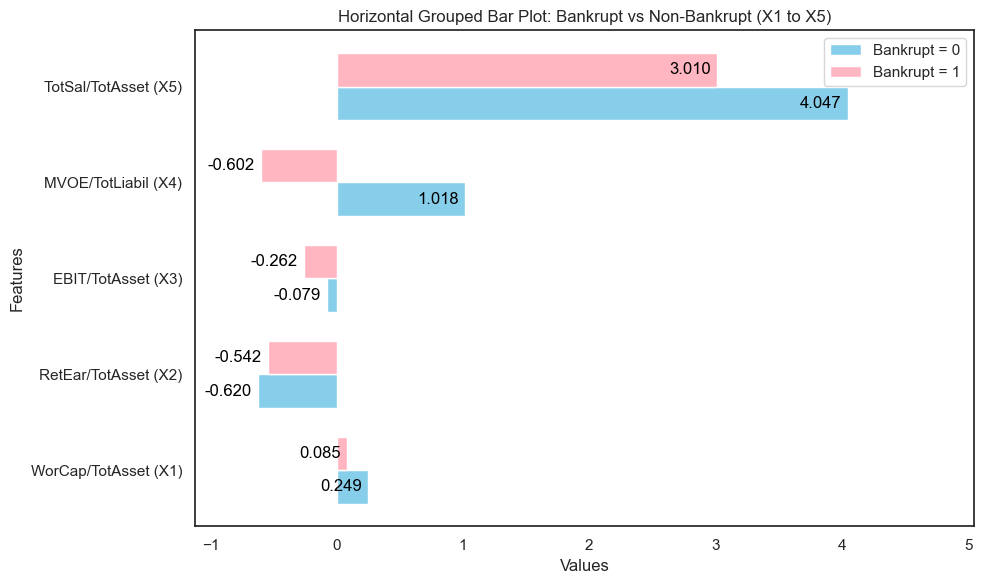

In [92]:
# Data for features and bankrupt statuses
features1 = ["WorCap/TotAsset (X1)", "RetEar/TotAsset (X2)", "EBIT/TotAsset (X3)", 
            "MVOE/TotLiabil (X4)", "TotSal/TotAsset (X5)"]

# New values for Bankrupt = 0 and Bankrupt = 1
bankrupt_0_values = [0.249283, -0.620371, -0.079230, 1.017682, 4.046517]
bankrupt_1_values = [0.085230, -0.542233, -0.262220, -0.601561, 3.009750]

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Set bar width and position
bar_width = 0.35
index = np.arange(len(features1))

# Plot horizontal grouped bars for Bankrupt = 0 and Bankrupt = 1
bars_0 = ax.barh(index, bankrupt_0_values, bar_width, label='Bankrupt = 0', color='skyblue')
bars_1 = ax.barh(index + bar_width, bankrupt_1_values, bar_width, label='Bankrupt = 1', color='lightpink')

# Add values on the bars with adjusted text placement
for i, bar in enumerate(bars_0):
    ax.text(bar.get_width() - 0.05, bar.get_y() + bar.get_height() / 2, 
            f'{bar.get_width():.3f}', va='center', ha='right', color='black')

for i, bar in enumerate(bars_1):
    ax.text(bar.get_width() - 0.05, bar.get_y() + bar.get_height() / 2, 
            f'{bar.get_width():.3f}', va='center', ha='right', color='black')

# Set labels and title
ax.set_xlabel('Values')
ax.set_ylabel('Features')
ax.set_title('Horizontal Grouped Bar Plot: Bankrupt vs Non-Bankrupt (X1 to X5)')
ax.set_yticks(index + bar_width / 2)  # Place y-ticks between the bars
ax.set_yticklabels(features1)
ax.legend()

# Adjust the x-axis limit to ensure text fits within the plot
ax.set_xlim(min(min(bankrupt_0_values), min(bankrupt_1_values)) - 0.5, max(max(bankrupt_0_values), max(bankrupt_1_values)) + 1)

plt.tight_layout()
plt.show()


In [93]:
print("Number of Records : ",bd.shape[0],"\nNumber of Features : ",bd.shape[1])

Number of Records :  62051 
Number of Features :  6


In [94]:
print(bd.isnull().values.any())

False


In [95]:
bd.columns.values

array(['WorCap/TotAsset (X1)', 'RetEar/TotAsset (X2)',
       'EBIT/TotAsset (X3)', 'MVOE/TotLiabil (X4)',
       'TotSal/TotAsset (X5)', 'Bankrupt'], dtype=object)

In [96]:
bd.describe() # after removing inf,NaN values

WorCap/TotAsset (X1)  RetEar/TotAsset (X2)  EBIT/TotAsset (X3)  \
count          62051.000000          62051.000000        62051.000000   
mean               0.248591             -0.620041           -0.080003   
std                7.410034             11.967444            6.408676   
min            -1276.000000          -1364.000000        -1019.000000   
25%                0.295359             -0.071534           -0.096695   
50%                0.520518              0.002663            0.029703   
75%                0.717873              0.108094            0.135080   
max                4.333333            187.570480          377.500000   

       MVOE/TotLiabil (X4)  TotSal/TotAsset (X5)      Bankrupt  
count         62051.000000          62051.000000  62051.000000  
mean              1.010845              4.042139      0.004222  
std               6.037540             17.167773      0.064843  
min            -397.000000              0.000147      0.000000  
25%               0.086327              1.583779      0.000000  
50%               0.342419              2.973132      0.000000  
75%               0.929158              4.740475      0.000000  
max             306.000000           2550.250000      1.000000

In [97]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62051 entries, 0 to 91297
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   WorCap/TotAsset (X1)  62051 non-null  float64
 1   RetEar/TotAsset (X2)  62051 non-null  float64
 2   EBIT/TotAsset (X3)    62051 non-null  float64
 3   MVOE/TotLiabil (X4)   62051 non-null  float64
 4   TotSal/TotAsset (X5)  62051 non-null  float64
 5   Bankrupt              62051 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 3.3 MB


In [98]:
# Count the number of duplicate rows
num_duplicates = bd.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 621


In [99]:
bd['Bankrupt'].value_counts().reset_index(name='count')

Bankrupt  count
0         0  61789
1         1    262

In [100]:
# Calculate IQR
Q1 = bd[features].quantile(0.25)
Q3 = bd[features].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers using IQR
outliers_iqr = ((bd[features] < (Q1 - 1.5 * IQR)) | (bd[features] > (Q3 + 1.5 * IQR)))

# Calculate Z-scores
z_scores = bd[features].apply(zscore)

# Detect outliers using Z-score (Threshold > 3 or < -3)
outliers_zscore = (z_scores > 3) | (z_scores < -3)

# Count the total outliers for each feature based on both methods
outlier_counts_iqr = outliers_iqr.sum(axis=0)
outlier_counts_zscore = outliers_zscore.sum(axis=0)

print("\nTotal outliers for each variable (based on IQR and Z-score):")
print(f"IQR-based outliers:\n{outlier_counts_iqr}")
print(f"Z-score-based outliers:\n{outlier_counts_zscore}")


Total outliers for each variable (based on IQR and Z-score):
IQR-based outliers:
WorCap/TotAsset (X1)     3145
RetEar/TotAsset (X2)    12524
EBIT/TotAsset (X3)       7387
MVOE/TotLiabil (X4)      7754
TotSal/TotAsset (X5)     2672
Bankrupt                  262
dtype: int64
Z-score-based outliers:
WorCap/TotAsset (X1)     90
RetEar/TotAsset (X2)    175
EBIT/TotAsset (X3)      121
MVOE/TotLiabil (X4)     559
TotSal/TotAsset (X5)    137
Bankrupt                262
dtype: int64


In [101]:
# Calculate IQR
Q1 = bd[features].quantile(0.25)
Q3 = bd[features].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply Winsorization: Clip values to the range [lower_bound, upper_bound]
bd_winsorized = bd[features].copy()

# Count the original outliers based on IQR
outliers_iqr = ((bd[features] < (lower_bound)) | (bd[features] > (upper_bound)))
outlier_counts_iqr = outliers_iqr.sum(axis=0)

# Apply Winsorization by clipping values
for feature in features:
    bd_winsorized[feature] = np.clip(bd[feature], lower_bound[feature], upper_bound[feature])

# Check if the outliers were handled
outliers_winsorized = ((bd_winsorized < (lower_bound)) | (bd_winsorized > (upper_bound)))
outlier_counts_winsorized = outliers_winsorized.sum(axis=0)

# Calculate the number of outliers handled (difference)
outliers_handled = outlier_counts_iqr - outlier_counts_winsorized

print("\nTotal outliers before and after Winsorization for each variable:")
print(f"Before Winsorization-based outliers:\n{outlier_counts_iqr}")
print(f"After Winsorization-based outliers:\n{outlier_counts_winsorized}")
print(f"Outliers handled (replaced):\n{outliers_handled}")
bd_winsorized


Total outliers before and after Winsorization for each variable:
Before Winsorization-based outliers:
WorCap/TotAsset (X1)     3145
RetEar/TotAsset (X2)    12524
EBIT/TotAsset (X3)       7387
MVOE/TotLiabil (X4)      7754
TotSal/TotAsset (X5)     2672
Bankrupt                  262
dtype: int64
After Winsorization-based outliers:
WorCap/TotAsset (X1)    0
RetEar/TotAsset (X2)    0
EBIT/TotAsset (X3)      0
MVOE/TotLiabil (X4)     0
TotSal/TotAsset (X5)    0
Bankrupt                0
dtype: int64
Outliers handled (replaced):
WorCap/TotAsset (X1)     3145
RetEar/TotAsset (X2)    12524
EBIT/TotAsset (X3)       7387
MVOE/TotLiabil (X4)      7754
TotSal/TotAsset (X5)     2672
Bankrupt                  262
dtype: int64


WorCap/TotAsset (X1)  RetEar/TotAsset (X2)  EBIT/TotAsset (X3)  \
0                  0.876869              0.000000           -0.092722   
1                  0.854150              0.000000           -0.103781   
2                  0.924120              0.000000            0.400315   
3                  0.901780              0.377538           -0.149019   
4                  0.916238              0.377538           -0.207331   
...                     ...                   ...                 ...   
91290              0.501075             -0.034409            0.156989   
91294              0.885372              0.000000            0.006235   
91295              0.885372              0.000000            0.037890   
91296              0.834850              0.000000            0.060965   
91297              0.817085              0.015927            0.033784   

       MVOE/TotLiabil (X4)  TotSal/TotAsset (X5)  Bankrupt  
0                 0.516511              0.452974         0  
1                 0.289363              0.466852         0  
2                 1.007617              0.292065         0  
3                 0.965024              0.341821         0  
4                 0.734964              0.400564         0  
...                    ...                   ...       ...  
91290             0.664122              2.172043         0  
91294             0.418410              0.325659         0  
91295             0.418410              1.953477         0  
91296             0.366391              2.055050         0  
91297             0.319261              2.339768         0  

[62051 rows x 6 columns]

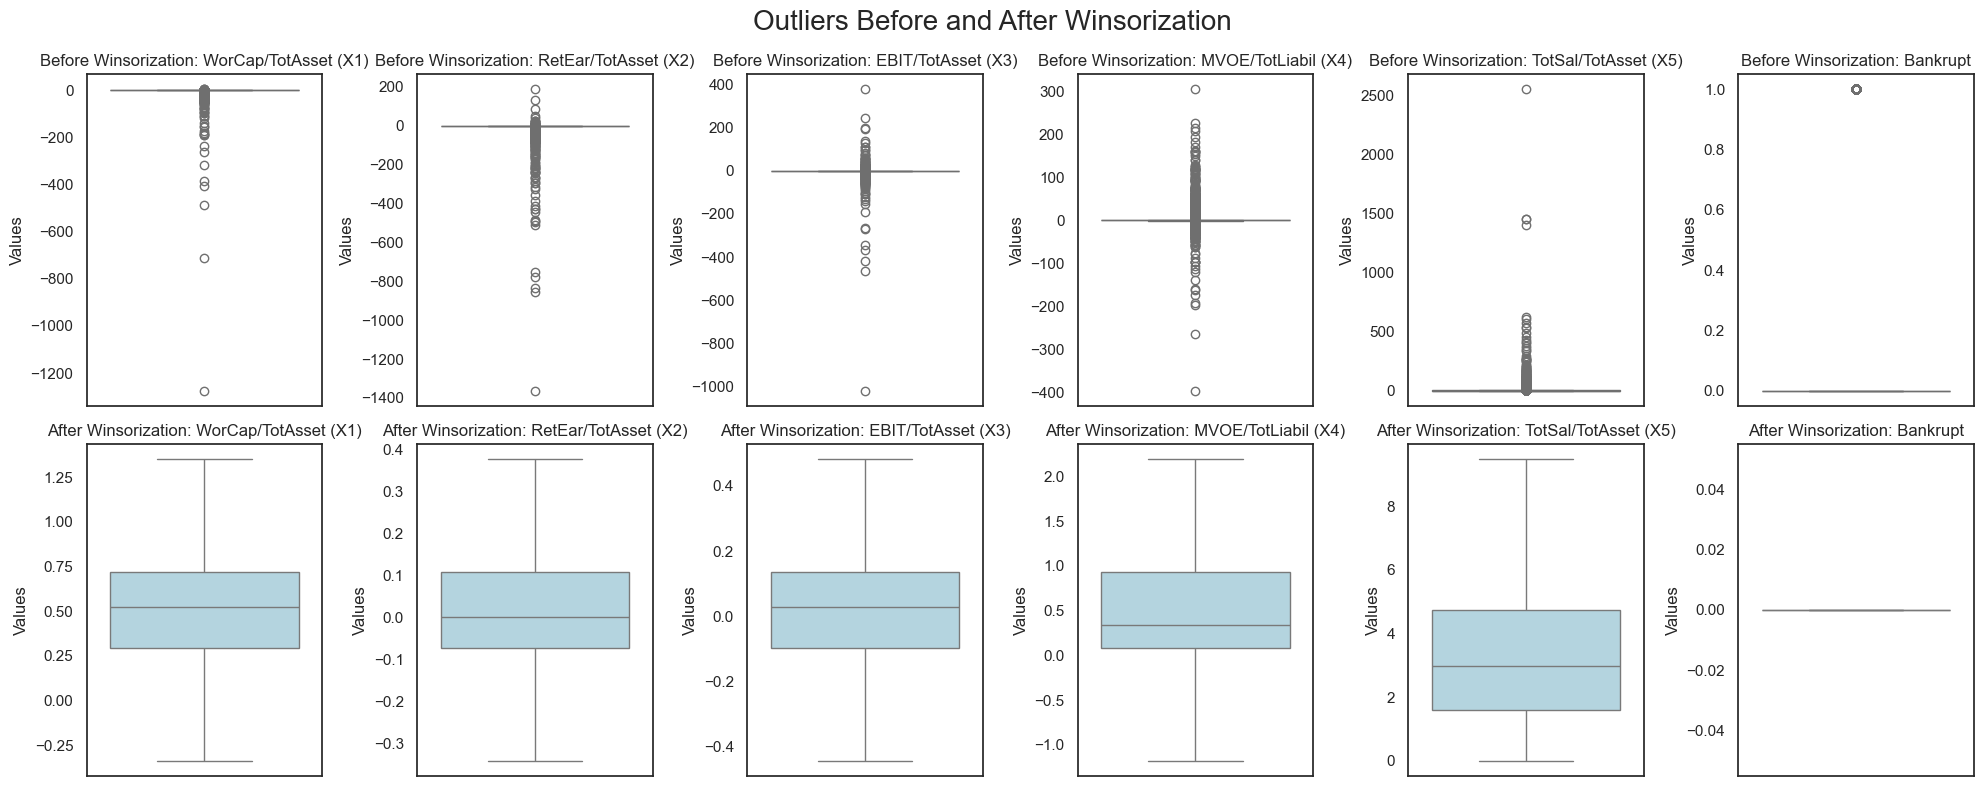

In [102]:
# Step 1: Set up the figure with 2 rows (Before Winsorization, After Winsorization)
num_features = len(features)  # Number of features
fig, axes = plt.subplots(2, num_features, figsize=(20, 8))  # 2 rows for before and after, 1 column for each feature

# Step 2: Boxplot for each feature (Before Winsorization)
for i, col in enumerate(features):
    sb.boxplot(y=bd[col], ax=axes[0, i], color='skyblue', showfliers=True)  # Before Winsorization
    axes[0, i].set_title(f"Before Winsorization: {col}")
    axes[0, i].set_xlabel("")
    axes[0, i].set_ylabel("Values")

# Step 3: Boxplot for each feature (After Winsorization)
for i, col in enumerate(features):
    sb.boxplot(y=bd_winsorized[col], ax=axes[1, i], color='lightblue', showfliers=True)  # After Winsorization
    axes[1, i].set_title(f"After Winsorization: {col}")
    axes[1, i].set_xlabel("")
    axes[1, i].set_ylabel("Values")

# Step 4: Layout adjustment
plt.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle("Outliers Before and After Winsorization", fontsize=20)
plt.show()


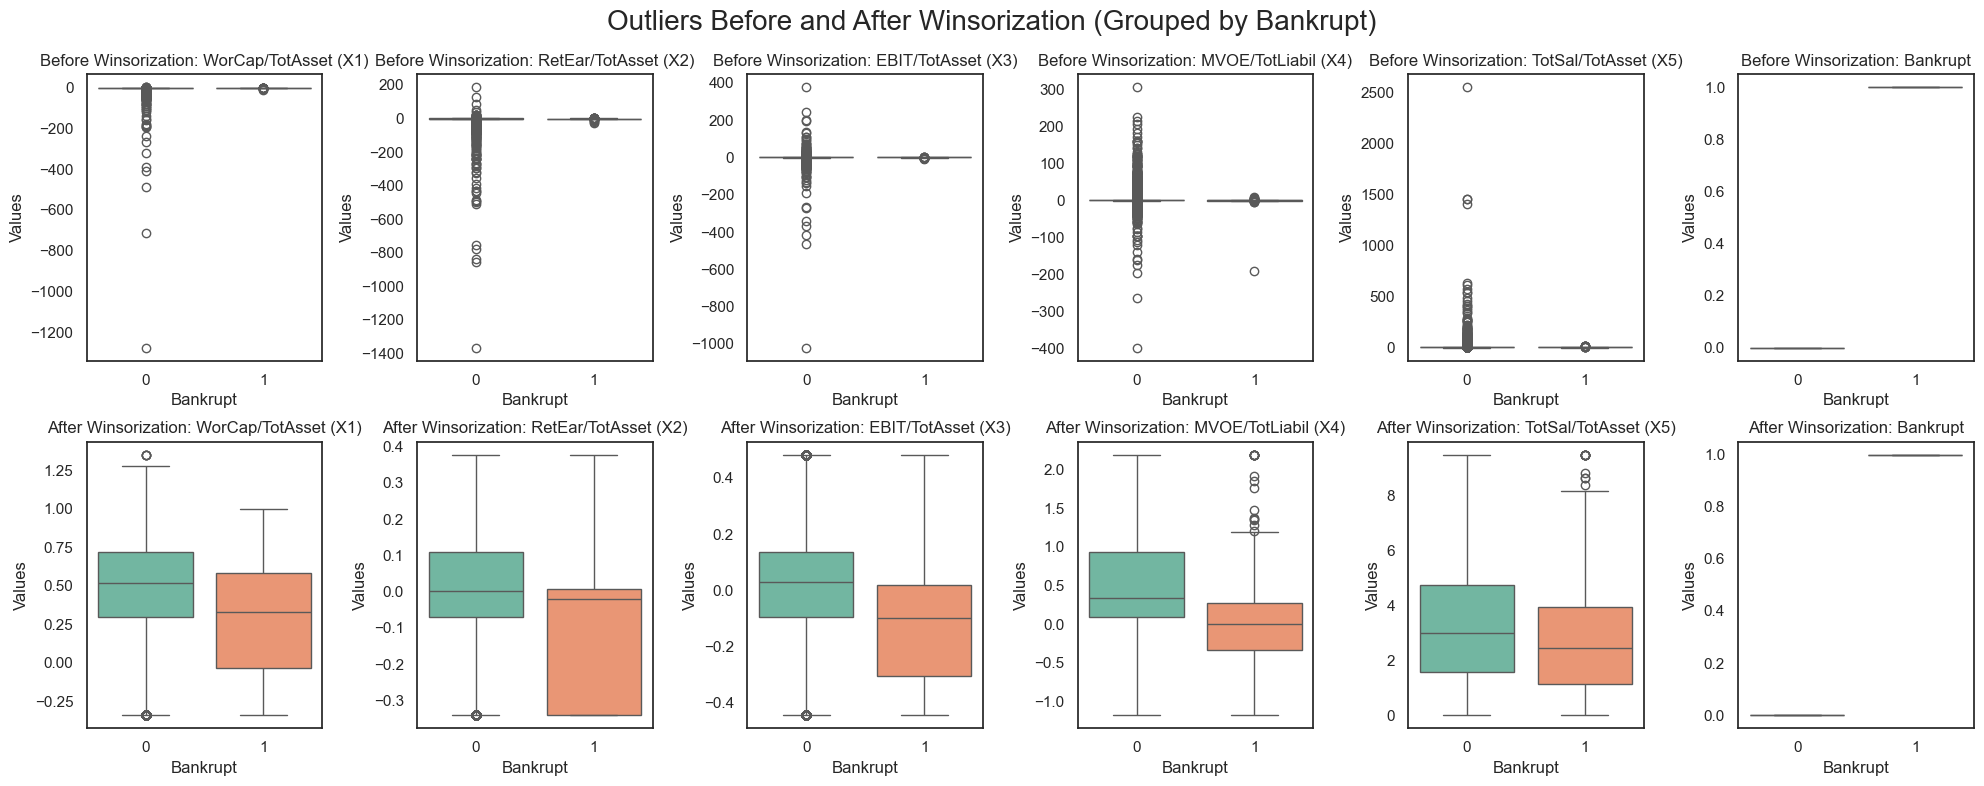

In [103]:
# Step 1: Ensure 'Bankrupt' column is added to both original and winsorized data
bd['Bankrupt'] = bd['Bankrupt']  # Ensure 'Bankrupt' column is correctly included
bd_winsorized['Bankrupt'] = bd['Bankrupt']  # Ensure 'Bankrupt' column is correctly included in winsorized data

# Step 2: Set up the figure with 2 rows (Before Winsorization, After Winsorization)
num_features = len(features)  # Number of features
fig, axes = plt.subplots(2, num_features, figsize=(20, 8))  # 2 rows for before and after, 1 column for each feature

# Step 3: Boxplot for each feature (Before Winsorization) grouped by Bankrupt
for i, col in enumerate(features):
    # Plot for before Winsorization, grouped by 'Bankrupt' (0 and 1)
    sb.boxplot(x='Bankrupt', y=bd[col], ax=axes[0, i], data=bd, palette="Set2", showfliers=True)
    axes[0, i].set_title(f"Before Winsorization: {col}")
    axes[0, i].set_xlabel("Bankrupt")
    axes[0, i].set_ylabel("Values")

# Step 4: Boxplot for each feature (After Winsorization) grouped by Bankrupt
for i, col in enumerate(features):
    # Plot for after Winsorization, grouped by 'Bankrupt' (0 and 1)
    sb.boxplot(x='Bankrupt', y=bd_winsorized[col], ax=axes[1, i], data=bd_winsorized, palette="Set2", showfliers=True)
    axes[1, i].set_title(f"After Winsorization: {col}")
    axes[1, i].set_xlabel("Bankrupt")
    axes[1, i].set_ylabel("Values")

# Step 5: Layout adjustment and display
plt.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle("Outliers Before and After Winsorization (Grouped by Bankrupt)", fontsize=20)
plt.show()


In [104]:
bd_winsorized['Bankrupt'].value_counts().reset_index(name='count')

Bankrupt  count
0         0  61789
1         1    262

In [105]:
# 📘 Sample Imbalanced Dataset (Use your own dataset here)
X, y = make_classification(n_samples=29249, n_features=5, n_classes=2, 
                           weights=[0.9, 0.1], random_state=42)

# 📘 Define Sampling Methods
sampling_methods = {
    'Random Over-Sampling': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'Random Under-Sampling': RandomUnderSampler(random_state=42),
    'Tomek Links': TomekLinks(),
    'NearMiss': NearMiss(version=1),
    'Cluster Centroids': ClusterCentroids(random_state=42),
    'SMOTE + Tomek Links': SMOTETomek(random_state=42),
    'SMOTE + ENN': SMOTEENN(random_state=42)
}

# 📘 Define Classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 📘 Table to store results
results_table = []

# ⚙️ Loop through each sampling method
for method_name, sampler in sampling_methods.items():
    print(f"\n🚀 Applying {method_name}")
    
    try:
        # Apply the sampling method
        X = bd_winsorized.drop(["Bankrupt"], axis=1)  # Features for training data
        y = bd_winsorized["Bankrupt"]  # Labels for training data
        X_resampled, y_resampled = sampler.fit_resample(X, y)
        
        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
        
        # Loop through each classifier
        for clf_name, clf in classifiers.items():
            print(f"\n🔍 Training with {clf_name} for {method_name}")
            
            # Train the classifier
            clf.fit(X_train, y_train)
            
            # Make predictions
            y_pred = clf.predict(X_test)
            
            # Calculate performance metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, zero_division=0)
            recall = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            
            # Append the results to the table
            results_table.append({
                'Sampling Method': method_name,
                'Classifier': clf_name,
                'Accuracy': round(accuracy, 4),
                'Precision': round(precision, 4),
                'Recall': round(recall, 4),
                'F1-Score': round(f1, 4)
            })
            
    except Exception as e:
        print(f"⚠️ Error while processing {method_name} with {clf_name}: {e}")

# 📘 Create a DataFrame to display the results
results_df = pd.DataFrame(results_table)
results_df = results_df.sort_values(by=['Sampling Method', 'Classifier'])

# 📘 Display the summary table
print("\n🎉 Summary of Classifier Performance on Different Sampling Methods 🎉\n")
print(results_df)

# Save to CSV if needed
results_df.to_csv('sampling_results.csv', index=False)



🚀 Applying Random Over-Sampling

🔍 Training with Logistic Regression for Random Over-Sampling

🔍 Training with Random Forest for Random Over-Sampling

🔍 Training with XGBoost for Random Over-Sampling

🚀 Applying SMOTE

🔍 Training with Logistic Regression for SMOTE

🔍 Training with Random Forest for SMOTE

🔍 Training with XGBoost for SMOTE

🚀 Applying ADASYN

🔍 Training with Logistic Regression for ADASYN

🔍 Training with Random Forest for ADASYN

🔍 Training with XGBoost for ADASYN

🚀 Applying Random Under-Sampling

🔍 Training with Logistic Regression for Random Under-Sampling

🔍 Training with Random Forest for Random Under-Sampling

🔍 Training with XGBoost for Random Under-Sampling

🚀 Applying Tomek Links

🔍 Training with Logistic Regression for Tomek Links

🔍 Training with Random Forest for Tomek Links

🔍 Training with XGBoost for Tomek Links

🚀 Applying NearMiss

🔍 Training with Logistic Regression for NearMiss

🔍 Training with Random Forest for NearMiss

🔍 Training with XGBoost for

  File "C:\Users\Admin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Admin\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



🔍 Training with Logistic Regression for Cluster Centroids

🔍 Training with Random Forest for Cluster Centroids

🔍 Training with XGBoost for Cluster Centroids

🚀 Applying SMOTE + Tomek Links

🔍 Training with Logistic Regression for SMOTE + Tomek Links

🔍 Training with Random Forest for SMOTE + Tomek Links

🔍 Training with XGBoost for SMOTE + Tomek Links

🚀 Applying SMOTE + ENN

🔍 Training with Logistic Regression for SMOTE + ENN

🔍 Training with Random Forest for SMOTE + ENN

🔍 Training with XGBoost for SMOTE + ENN

🎉 Summary of Classifier Performance on Different Sampling Methods 🎉

          Sampling Method           Classifier  Accuracy  Precision  Recall  \
6                  ADASYN  Logistic Regression    0.7222     0.7234  0.7140   
7                  ADASYN        Random Forest    0.9834     0.9747  0.9923   
8                  ADASYN              XGBoost    0.9516     0.9281  0.9783   
18      Cluster Centroids  Logistic Regression    0.5759     0.5432  0.5946   
19      Cluste

In [106]:
print(bd.columns.str.strip())

Index(['WorCap/TotAsset (X1)', 'RetEar/TotAsset (X2)', 'EBIT/TotAsset (X3)',
       'MVOE/TotLiabil (X4)', 'TotSal/TotAsset (X5)', 'Bankrupt'],
      dtype='object')


In [107]:
bd.shape

(62051, 6)

In [108]:
# Step 1: Prepare features and labels
X = bd_winsorized.drop(["Bankrupt"], axis=1)  # Features for training data
y = bd_winsorized["Bankrupt"]  # Labels for training data

print(X.shape)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,shuffle=True, random_state=1)

# Step 3: Apply SMOTE+ENN to balance the training set
smote_enn = SMOTEENN(random_state=42)  # SMOTE + ENN combines oversampling and undersampling
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)



# Print dataset information
print("Original Training Set Shape (X_train):", X_train.shape)
print("Original Training Set Shape (y_train):", y_train.shape)
print("Original Training Set Shape (X_test):", X_test.shape)
print("Original Training Set Shape (y_test):", y_test.shape)
print("Resampled Training Set Shape (X_train):", X_train_resampled.shape)
print("Resampled Training Set Shape (X_train):", y_train_resampled.shape)
print("Distribution of Class Labels in y_train (before SMOTE + ENN):\n", y_train.value_counts())
print("Distribution of Class Labels in y_train (after SMOTE + ENN):\n", y_train_resampled.value_counts())
print(X.columns)
# Check if there are any NaN values after resampling
print("Does X_train_resampled contain NaN values?", np.isnan(X_train_resampled).sum().sum())

(62051, 5)
Original Training Set Shape (X_train): (37230, 5)
Original Training Set Shape (y_train): (37230,)
Original Training Set Shape (X_test): (24821, 5)
Original Training Set Shape (y_test): (24821,)
Resampled Training Set Shape (X_train): (71169, 5)
Resampled Training Set Shape (X_train): (71169,)
Distribution of Class Labels in y_train (before SMOTE + ENN):
 Bankrupt
0    37071
1      159
Name: count, dtype: int64
Distribution of Class Labels in y_train (after SMOTE + ENN):
 Bankrupt
1    36806
0    34363
Name: count, dtype: int64
Index(['WorCap/TotAsset (X1)', 'RetEar/TotAsset (X2)', 'EBIT/TotAsset (X3)',
       'MVOE/TotLiabil (X4)', 'TotSal/TotAsset (X5)'],
      dtype='object')
Does X_train_resampled contain NaN values? 0


In [109]:
# Ranking by variance
variance_ranks1 = X.var().rank(ascending=False)
variance_ranks1

WorCap/TotAsset (X1)    3.0
RetEar/TotAsset (X2)    5.0
EBIT/TotAsset (X3)      4.0
MVOE/TotLiabil (X4)     2.0
TotSal/TotAsset (X5)    1.0
dtype: float64

In [110]:
# Check for missing values
print(X.isnull().sum())
print(y.isnull().sum())
print(X.isna().sum())

WorCap/TotAsset (X1)    0
RetEar/TotAsset (X2)    0
EBIT/TotAsset (X3)      0
MVOE/TotLiabil (X4)     0
TotSal/TotAsset (X5)    0
dtype: int64
0
WorCap/TotAsset (X1)    0
RetEar/TotAsset (X2)    0
EBIT/TotAsset (X3)      0
MVOE/TotLiabil (X4)     0
TotSal/TotAsset (X5)    0
dtype: int64


In [111]:
X_train_resampled.replace([np.inf, -np.inf], 0, inplace=True)
X_test.replace([np.inf, -np.inf], 0, inplace=True)
y_train_resampled.replace([np.inf, -np.inf], 0, inplace=True)
y_test.replace([np.inf, -np.inf], 0, inplace=True)

Text(0, 0.5, 'Mutual Information')

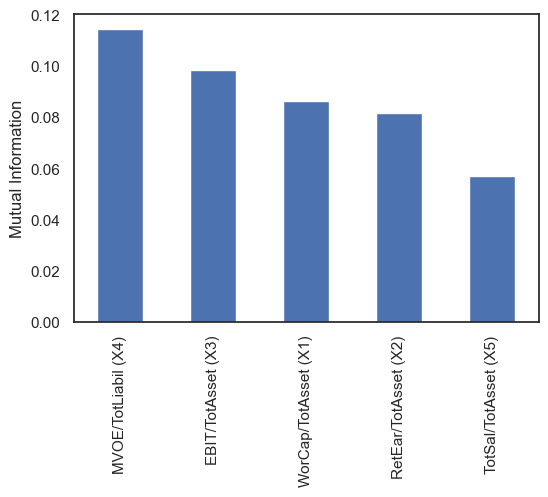

In [112]:
mi = mutual_info_classif(X_train_resampled, y_train_resampled)
mi = pd.Series(mi)
mi.index = X_train_resampled.columns
mi.sort_values(ascending=False).plot.bar(figsize=(6, 4))
plt.ylabel('Mutual Information')

In [113]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_resampled)
X_test_scaled = sc.transform(X_test)

In [114]:
print(X_train_scaled.shape, X_test_scaled.shape)
print(y_train_resampled.shape, y_test.shape)
print(y_train_resampled.value_counts())
print(y_test.value_counts())
print(X_train_scaled)

(71169, 5) (24821, 5)
(71169,) (24821,)
Bankrupt
1    36806
0    34363
Name: count, dtype: int64
Bankrupt
0    24718
1      103
Name: count, dtype: int64
[[ 1.47669214 -1.62854844 -1.72819682  1.51981143 -1.07377664]
 [ 0.2860394   2.1224352   0.15482973  0.74982519 -0.96285848]
 [-1.06099061 -1.60703569  0.58257035 -0.44723545  0.77974236]
 ...
 [-1.95559072 -0.13340852 -1.54861438 -1.10465748  0.54165274]
 [-0.88604047  0.03632872 -0.00899684 -0.36157986 -0.29838023]
 [-0.44397457  0.65335023  0.5585118  -0.16444563  0.04410526]]


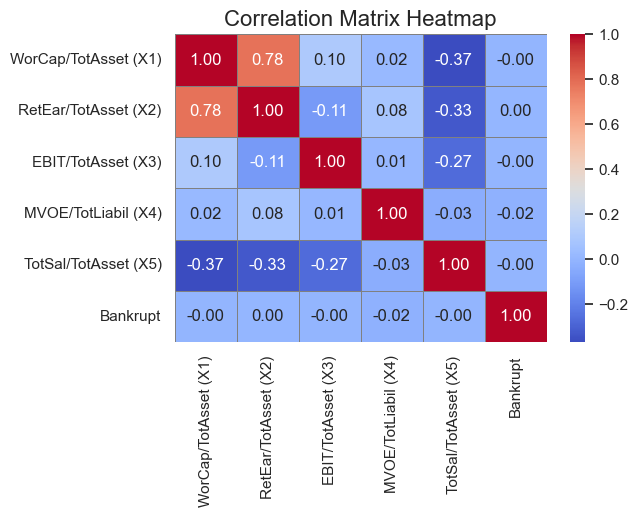

In [115]:
# Compute the correlation matrix
correlation_matrix = bd.corr()
# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# Create a heatmap using seaborn
sb.heatmap(correlation_matrix, 
            annot=True,  # Annotate cells with correlation values
            fmt=".2f",   # Format annotations to 2 decimal places
            cmap="coolwarm",  # Use a diverging color map
            cbar=True,   # Show color bar
            linewidths=0.5,  # Add space between cells
            linecolor='gray'  # Line color between cells
           )

# Add title
plt.title("Correlation Matrix Heatmap", fontsize=16)

# Show the plot
plt.show()

In [116]:
print(y_train_resampled.value_counts())
print(y_test.value_counts())

Bankrupt
1    36806
0    34363
Name: count, dtype: int64
Bankrupt
0    24718
1      103
Name: count, dtype: int64


In [117]:
print(X_train_scaled.shape)  # Should match the length of y_train_resampled
print(y_train_resampled.shape)
print(X_test_scaled.shape)  # Should match the length of y_train_resampled
print(y_test.shape)

(71169, 5)
(71169,)
(24821, 5)
(24821,)


In [118]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd

# Before Tuning
# Define the Logistic Regression model with default hyperparameters
logreg = LogisticRegression(random_state=42)

# Train the Logistic Regression model before tuning
logreg.fit(X_train_scaled, y_train_resampled)

# Predict on training and test data before tuning
y_train_pred_logreg = logreg.predict(X_train_scaled)
y_test_pred_logreg = logreg.predict(X_test_scaled)

# Calculate confusion matrix and accuracy for training and test sets before tuning
confusion_matrix_train_logreg = confusion_matrix(y_train_resampled, y_train_pred_logreg)
confusion_matrix_test_logreg = confusion_matrix(y_test, y_test_pred_logreg)

accuracy_train_logreg = accuracy_score(y_train_resampled, y_train_pred_logreg)
accuracy_test_logreg = accuracy_score(y_test, y_test_pred_logreg)

# Get classification reports before tuning
classification_report_train_logreg = classification_report(y_train_resampled, y_train_pred_logreg, output_dict=True)
classification_report_test_logreg = classification_report(y_test, y_test_pred_logreg, output_dict=True)

# After Tuning
# Define the Logistic Regression model with tuned hyperparameters
logreg_tuned = LogisticRegression(
    random_state=42,
    solver='liblinear',
    penalty='l1',  # L1 regularization for sparsity
    C=0.5          # Regularization strength (inverse of regularization)
)

# Train the Logistic Regression model after tuning
logreg_tuned.fit(X_train_scaled, y_train_resampled)

# Predict on training and test data after tuning
y_train_pred_logreg_tuned = logreg_tuned.predict(X_train_scaled)
y_test_pred_logreg_tuned = logreg_tuned.predict(X_test_scaled)

# Calculate confusion matrix and accuracy for training and test sets after tuning
confusion_matrix_train_logreg_tuned = confusion_matrix(y_train_resampled, y_train_pred_logreg_tuned)
confusion_matrix_test_logreg_tuned = confusion_matrix(y_test, y_test_pred_logreg_tuned)

accuracy_train_logreg_tuned = accuracy_score(y_train_resampled, y_train_pred_logreg_tuned)
accuracy_test_logreg_tuned = accuracy_score(y_test, y_test_pred_logreg_tuned)

# Get classification reports after tuning
classification_report_train_logreg_tuned = classification_report(y_train_resampled, y_train_pred_logreg_tuned, output_dict=True)
classification_report_test_logreg_tuned = classification_report(y_test, y_test_pred_logreg_tuned, output_dict=True)

# Create a summary dataframe to compare results side by side
train_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (class 0)', 'Recall (class 0)', 'F1-score (class 0)', 
               'Precision (class 1)', 'Recall (class 1)', 'F1-score (class 1)'],
    'Before Tuning': [
        accuracy_train_logreg,
        classification_report_train_logreg['0']['precision'],
        classification_report_train_logreg['0']['recall'],
        classification_report_train_logreg['0']['f1-score'],
        classification_report_train_logreg['1']['precision'],
        classification_report_train_logreg['1']['recall'],
        classification_report_train_logreg['1']['f1-score']
    ],
    'After Tuning': [
        accuracy_train_logreg_tuned,
        classification_report_train_logreg_tuned['0']['precision'],
        classification_report_train_logreg_tuned['0']['recall'],
        classification_report_train_logreg_tuned['0']['f1-score'],
        classification_report_train_logreg_tuned['1']['precision'],
        classification_report_train_logreg_tuned['1']['recall'],
        classification_report_train_logreg_tuned['1']['f1-score']
    ]
})

test_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (class 0)', 'Recall (class 0)', 'F1-score (class 0)', 
               'Precision (class 1)', 'Recall (class 1)', 'F1-score (class 1)'],
    'Before Tuning': [
        accuracy_test_logreg,
        classification_report_test_logreg['0']['precision'],
        classification_report_test_logreg['0']['recall'],
        classification_report_test_logreg['0']['f1-score'],
        classification_report_test_logreg['1']['precision'],
        classification_report_test_logreg['1']['recall'],
        classification_report_test_logreg['1']['f1-score']
    ],
    'After Tuning': [
        accuracy_test_logreg_tuned,
        classification_report_test_logreg_tuned['0']['precision'],
        classification_report_test_logreg_tuned['0']['recall'],
        classification_report_test_logreg_tuned['0']['f1-score'],
        classification_report_test_logreg_tuned['1']['precision'],
        classification_report_test_logreg_tuned['1']['recall'],
        classification_report_test_logreg_tuned['1']['f1-score']
    ]
})

# Print comparison tables
print("Training Set Comparison:")
print(train_comparison)
print('-----------------------------------------------')

print("Test Set Comparison:")
print(test_comparison)

# Optionally, print confusion matrices side by side
print("\nConfusion Matrix for Training Set (Before vs After Tuning):")
print(f"Before Tuning:\n{confusion_matrix_train_logreg}")
print(f"After Tuning:\n{confusion_matrix_train_logreg_tuned}")

print("\nConfusion Matrix for Test Set (Before vs After Tuning):")
print(f"Before Tuning:\n{confusion_matrix_test_logreg}")
print(f"After Tuning:\n{confusion_matrix_test_logreg_tuned}")


Training Set Comparison:
                Metric  Before Tuning  After Tuning
0             Accuracy       0.730950      0.730950
1  Precision (class 0)       0.721065      0.721039
2     Recall (class 0)       0.722114      0.722172
3   F1-score (class 0)       0.721589      0.721605
4  Precision (class 1)       0.740206      0.740232
5     Recall (class 1)       0.739200      0.739146
6   F1-score (class 1)       0.739703      0.739688
-----------------------------------------------
Test Set Comparison:
                Metric  Before Tuning  After Tuning
0             Accuracy       0.699972      0.699972
1  Precision (class 0)       0.998557      0.998557
2     Recall (class 0)       0.699733      0.699733
3   F1-score (class 0)       0.822855      0.822855
4  Precision (class 1)       0.010400      0.010400
5     Recall (class 1)       0.757282      0.757282
6   F1-score (class 1)       0.020518      0.020518

Confusion Matrix for Training Set (Before vs After Tuning):
Before Tuning


AUC-ROC for Training Set: 0.7840211998726612
AUC-ROC for Test Set: 0.7891269834411776


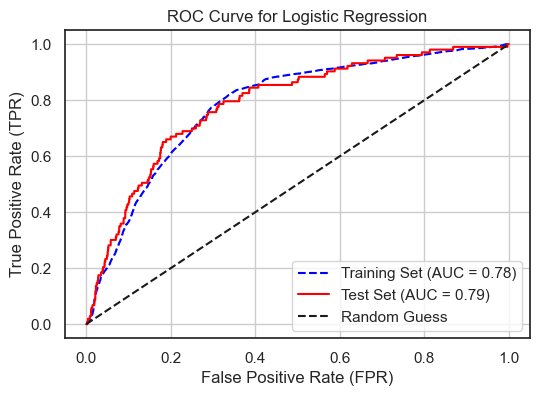

In [119]:
# Predict probabilities for the positive class
y_train_prob_logreg = logreg.predict_proba(X_train_scaled)[:, 1]
y_test_prob_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

# Calculate the AUC-ROC scores
auc_train = roc_auc_score(y_train_resampled, y_train_prob_logreg)
auc_test = roc_auc_score(y_test, y_test_prob_logreg)


print("\nAUC-ROC for Training Set:", auc_train)
print("AUC-ROC for Test Set:", auc_test)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
fpr_train, tpr_train, _ = roc_curve(y_train_resampled, y_train_prob_logreg)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob_logreg)

plt.plot(fpr_train, tpr_train, label=f'Training Set (AUC = {auc_train:.2f})', linestyle='--', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test Set (AUC = {auc_test:.2f})', color='red')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Add labels and legend
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid()
plt.show()


In [120]:
# Define the XGBoost model before tuning
xgb = XGBClassifier(random_state=42)

# Train the XGBoost model before tuning
xgb.fit(X_train_scaled, y_train_resampled)

# Predict on training and test data before tuning
y_train_pred_xgb = xgb.predict(X_train_scaled)
y_test_pred_xgb = xgb.predict(X_test_scaled)

# Calculate confusion matrix and accuracy for training and test sets before tuning
confusion_matrix_train_xgb = confusion_matrix(y_train_resampled, y_train_pred_xgb)
confusion_matrix_test_xgb = confusion_matrix(y_test, y_test_pred_xgb)

accuracy_train_xgb = accuracy_score(y_train_resampled, y_train_pred_xgb)
accuracy_test_xgb = accuracy_score(y_test, y_test_pred_xgb)

# Get classification reports before tuning
classification_report_train_xgb = classification_report(y_train_resampled, y_train_pred_xgb, output_dict=True)
classification_report_test_xgb = classification_report(y_test, y_test_pred_xgb, output_dict=True)

# Define the scale_pos_weight (ratio of majority class to minority class)
scale_pos_weight = len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1])

# Define the XGBoost model after tuning
xgb_tuned = XGBClassifier(n_estimators=1000,random_state=42,learning_rate=0.01,max_depth=8,colsample_bytree=0.8,subsample=0.7,scale_pos_weight=scale_pos_weight * 1,max_delta_step=1,objective='binary:logitraw',eval_metric='auc')

# Train the XGBoost model after tuning
xgb_tuned.fit(X_train_scaled, y_train_resampled)

# Predict on training and test data after tuning
y_train_pred_xgb_tuned = xgb_tuned.predict(X_train_scaled)
y_test_pred_xgb_tuned = xgb_tuned.predict(X_test_scaled)

# Calculate confusion matrix and accuracy for training and test sets after tuning
confusion_matrix_train_xgb_tuned = confusion_matrix(y_train_resampled, y_train_pred_xgb_tuned)
confusion_matrix_test_xgb_tuned = confusion_matrix(y_test, y_test_pred_xgb_tuned)

accuracy_train_xgb_tuned = accuracy_score(y_train_resampled, y_train_pred_xgb_tuned)
accuracy_test_xgb_tuned = accuracy_score(y_test, y_test_pred_xgb_tuned)

# Get classification reports after tuning
classification_report_train_xgb_tuned = classification_report(y_train_resampled, y_train_pred_xgb_tuned, output_dict=True)
classification_report_test_xgb_tuned = classification_report(y_test, y_test_pred_xgb_tuned, output_dict=True)

# Create a summary dataframe to compare results side by side
train_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (class 0)', 'Recall (class 0)', 'F1-score (class 0)', 
               'Precision (class 1)', 'Recall (class 1)', 'F1-score (class 1)'],
    'Before Tuning': [
        accuracy_train_xgb,
        classification_report_train_xgb['0']['precision'],
        classification_report_train_xgb['0']['recall'],
        classification_report_train_xgb['0']['f1-score'],
        classification_report_train_xgb['1']['precision'],
        classification_report_train_xgb['1']['recall'],
        classification_report_train_xgb['1']['f1-score']
    ],
    'After Tuning': [
        accuracy_train_xgb_tuned,
        classification_report_train_xgb_tuned['0']['precision'],
        classification_report_train_xgb_tuned['0']['recall'],
        classification_report_train_xgb_tuned['0']['f1-score'],
        classification_report_train_xgb_tuned['1']['precision'],
        classification_report_train_xgb_tuned['1']['recall'],
        classification_report_train_xgb_tuned['1']['f1-score']
    ]
})

test_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (class 0)', 'Recall (class 0)', 'F1-score (class 0)', 
               'Precision (class 1)', 'Recall (class 1)', 'F1-score (class 1)'],
    'Before Tuning': [
        accuracy_test_xgb,
        classification_report_test_xgb['0']['precision'],
        classification_report_test_xgb['0']['recall'],
        classification_report_test_xgb['0']['f1-score'],
        classification_report_test_xgb['1']['precision'],
        classification_report_test_xgb['1']['recall'],
        classification_report_test_xgb['1']['f1-score']
    ],
    'After Tuning': [
        accuracy_test_xgb_tuned,
        classification_report_test_xgb_tuned['0']['precision'],
        classification_report_test_xgb_tuned['0']['recall'],
        classification_report_test_xgb_tuned['0']['f1-score'],
        classification_report_test_xgb_tuned['1']['precision'],
        classification_report_test_xgb_tuned['1']['recall'],
        classification_report_test_xgb_tuned['1']['f1-score']
    ]
})

# Print comparison tables
print("Training Set Comparison:")
print(train_comparison)
print('-----------------------------------------------')

print("Test Set Comparison:")
print(test_comparison)

# Optionally, print confusion matrices side by side
print("\nConfusion Matrix for Training Set (Before vs After Tuning):")
print(f"Before Tuning:\n{confusion_matrix_train_xgb}")
print(f"After Tuning:\n{confusion_matrix_train_xgb_tuned}")

print("\nConfusion Matrix for Test Set (Before vs After Tuning):")
print(f"Before Tuning:\n{confusion_matrix_test_xgb}")
print(f"After Tuning:\n{confusion_matrix_test_xgb_tuned}")


Training Set Comparison:
                Metric  Before Tuning  After Tuning
0             Accuracy       0.989139      0.978066
1  Precision (class 0)       0.996717      0.978498
2     Recall (class 0)       0.980735      0.976021
3   F1-score (class 0)       0.988662      0.977258
4  Precision (class 1)       0.982279      0.977665
5     Recall (class 1)       0.996984      0.979976
6   F1-score (class 1)       0.989577      0.978819
-----------------------------------------------
Test Set Comparison:
                Metric  Before Tuning  After Tuning
0             Accuracy       0.931389      0.939366
1  Precision (class 0)       0.996377      0.996577
2     Recall (class 0)       0.934501      0.942350
3   F1-score (class 0)       0.964448      0.968705
4  Precision (class 1)       0.011600      0.015884
5     Recall (class 1)       0.184466      0.223301
6   F1-score (class 1)       0.021827      0.029658

Confusion Matrix for Training Set (Before vs After Tuning):
Before Tuning


AUC-ROC for Training Set: 0.9976139013912201
AUC-ROC for Test Set: 0.6456813438106108


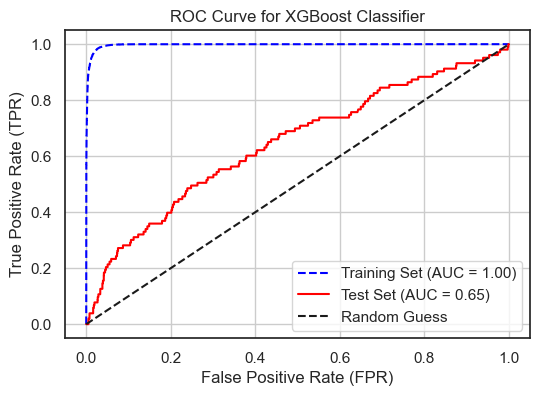

In [165]:
# Predict probabilities for the positive class
y_train_prob_xgb = xgb_tuned.predict_proba(X_train_scaled)[:, 1]
y_test_prob_xgb = xgb_tuned.predict_proba(X_test_scaled)[:, 1]

# Calculate the AUC-ROC scores
auc_train_xgb = roc_auc_score(y_train_resampled, y_train_prob_xgb)
auc_test_xgb = roc_auc_score(y_test, y_test_prob_xgb)

print("\nAUC-ROC for Training Set:", auc_train_xgb)
print("AUC-ROC for Test Set:", auc_test_xgb)

# Plot the ROC curve
plt.figure(figsize=(6,4))
fpr_train_xgb, tpr_train_xgb, _ = roc_curve(y_train_resampled, y_train_prob_xgb)
fpr_test_xgb, tpr_test_xgb, _ = roc_curve(y_test, y_test_prob_xgb)

plt.plot(fpr_train_xgb, tpr_train_xgb, label=f'Training Set (AUC = {auc_train_xgb:.2f})', linestyle='--', color='blue')
plt.plot(fpr_test_xgb, tpr_test_xgb, label=f'Test Set (AUC = {auc_test_xgb:.2f})', color='red')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Add labels and legend
plt.title('ROC Curve for XGBoost Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid()
plt.show()


In [122]:
# Before Tuning
# Define the Random Forest model with default hyperparameters
rf = RandomForestClassifier(random_state=42)

# Train the Random Forest model before tuning
rf.fit(X_train_scaled, y_train_resampled)

# Predict on training and test data before tuning
y_train_pred_rf = rf.predict(X_train_scaled)
y_test_pred_rf = rf.predict(X_test_scaled)

# Calculate confusion matrix and accuracy for training and test sets before tuning
confusion_matrix_train_rf = confusion_matrix(y_train_resampled, y_train_pred_rf)
confusion_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)

accuracy_train_rf = accuracy_score(y_train_resampled, y_train_pred_rf)
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)

# Get classification reports before tuning
classification_report_train_rf = classification_report(y_train_resampled, y_train_pred_rf, output_dict=True)
classification_report_test_rf = classification_report(y_test, y_test_pred_rf, output_dict=True)

# After Tuning
# Define the Random Forest model with specified hyperparameters
rf_tuned = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

# Train the Random Forest model after tuning
rf_tuned.fit(X_train_scaled, y_train_resampled)

# Predict on training and test data after tuning
y_train_pred_rf_tuned = rf_tuned.predict(X_train_scaled)
y_test_pred_rf_tuned = rf_tuned.predict(X_test_scaled)

# Calculate confusion matrix and accuracy for training and test sets after tuning
confusion_matrix_train_rf_tuned = confusion_matrix(y_train_resampled, y_train_pred_rf_tuned)
confusion_matrix_test_rf_tuned = confusion_matrix(y_test, y_test_pred_rf_tuned)

accuracy_train_rf_tuned = accuracy_score(y_train_resampled, y_train_pred_rf_tuned)
accuracy_test_rf_tuned = accuracy_score(y_test, y_test_pred_rf_tuned)

# Get classification reports after tuning
classification_report_train_rf_tuned = classification_report(y_train_resampled, y_train_pred_rf_tuned, output_dict=True)
classification_report_test_rf_tuned = classification_report(y_test, y_test_pred_rf_tuned, output_dict=True)

# Create a summary dataframe to compare results side by side
train_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (class 0)', 'Recall (class 0)', 'F1-score (class 0)', 
               'Precision (class 1)', 'Recall (class 1)', 'F1-score (class 1)'],
    'Before Tuning': [
        accuracy_train_rf,
        classification_report_train_rf['0']['precision'],
        classification_report_train_rf['0']['recall'],
        classification_report_train_rf['0']['f1-score'],
        classification_report_train_rf['1']['precision'],
        classification_report_train_rf['1']['recall'],
        classification_report_train_rf['1']['f1-score']
    ],
    'After Tuning': [
        accuracy_train_rf_tuned,
        classification_report_train_rf_tuned['0']['precision'],
        classification_report_train_rf_tuned['0']['recall'],
        classification_report_train_rf_tuned['0']['f1-score'],
        classification_report_train_rf_tuned['1']['precision'],
        classification_report_train_rf_tuned['1']['recall'],
        classification_report_train_rf_tuned['1']['f1-score']
    ]
})

test_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (class 0)', 'Recall (class 0)', 'F1-score (class 0)', 
               'Precision (class 1)', 'Recall (class 1)', 'F1-score (class 1)'],
    'Before Tuning': [
        accuracy_test_rf,
        classification_report_test_rf['0']['precision'],
        classification_report_test_rf['0']['recall'],
        classification_report_test_rf['0']['f1-score'],
        classification_report_test_rf['1']['precision'],
        classification_report_test_rf['1']['recall'],
        classification_report_test_rf['1']['f1-score']
    ],
    'After Tuning': [
        accuracy_test_rf_tuned,
        classification_report_test_rf_tuned['0']['precision'],
        classification_report_test_rf_tuned['0']['recall'],
        classification_report_test_rf_tuned['0']['f1-score'],
        classification_report_test_rf_tuned['1']['precision'],
        classification_report_test_rf_tuned['1']['recall'],
        classification_report_test_rf_tuned['1']['f1-score']
    ]
})

# Print comparison tables
print("Training Set Comparison:")
print(train_comparison)
print('-----------------------------------------------')

print("Test Set Comparison:")
print(test_comparison)

# Optionally, print confusion matrices side by side
print("\nConfusion Matrix for Training Set (Before vs After Tuning):")
print(f"Before Tuning:\n{confusion_matrix_train_rf}")
print(f"After Tuning:\n{confusion_matrix_train_rf_tuned}")

print("\nConfusion Matrix for Test Set (Before vs After Tuning):")
print(f"Before Tuning:\n{confusion_matrix_test_rf}")
print(f"After Tuning:\n{confusion_matrix_test_rf_tuned}")


Training Set Comparison:
                Metric  Before Tuning  After Tuning
0             Accuracy            1.0      0.997597
1  Precision (class 0)            1.0      0.999474
2     Recall (class 0)            1.0      0.995548
3   F1-score (class 0)            1.0      0.997507
4  Precision (class 1)            1.0      0.995858
5     Recall (class 1)            1.0      0.999511
6   F1-score (class 1)            1.0      0.997681
-----------------------------------------------
Test Set Comparison:
                Metric  Before Tuning  After Tuning
0             Accuracy       0.965634      0.959067
1  Precision (class 0)       0.996133      0.996190
2     Recall (class 0)       0.969253      0.962578
3   F1-score (class 0)       0.982509      0.979096
4  Precision (class 1)       0.012987      0.012807
5     Recall (class 1)       0.097087      0.116505
6   F1-score (class 1)       0.022910      0.023077

Confusion Matrix for Training Set (Before vs After Tuning):
Before Tuning


AUC-ROC for Training Set: 0.999992031718649
AUC-ROC for Test Set: 0.6657712590251041


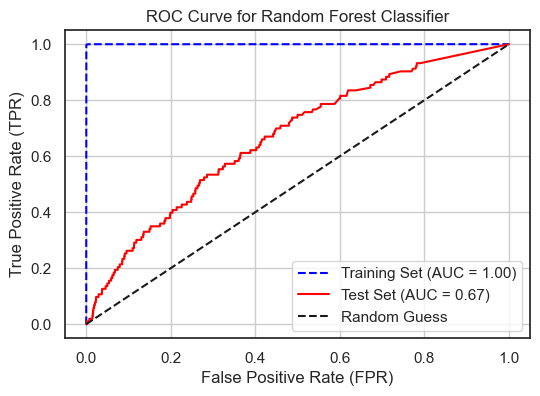

In [166]:
# Predict probabilities for the positive class
y_train_prob_rf = rf_tuned.predict_proba(X_train_scaled)[:, 1]
y_test_prob_rf = rf_tuned.predict_proba(X_test_scaled)[:, 1]

# Calculate the AUC-ROC scores
auc_train_rf = roc_auc_score(y_train_resampled, y_train_prob_rf)
auc_test_rf = roc_auc_score(y_test, y_test_prob_rf)

print("\nAUC-ROC for Training Set:", auc_train_rf)
print("AUC-ROC for Test Set:", auc_test_rf)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
fpr_train_rf, tpr_train_rf, _ = roc_curve(y_train_resampled, y_train_prob_rf)
fpr_test_rf, tpr_test_rf, _ = roc_curve(y_test, y_test_prob_rf)

plt.plot(fpr_train_rf, tpr_train_rf, label=f'Training Set (AUC = {auc_train_rf:.2f})', linestyle='--', color='blue')
plt.plot(fpr_test_rf, tpr_test_rf, label=f'Test Set (AUC = {auc_test_rf:.2f})', color='red')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Add labels and legend
plt.title('ROC Curve for Random Forest Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid()
plt.show()


In [124]:
# Convert X_train to a DataFrame if it's a numpy array (if you want to keep feature names)
X_train_convert = pd.DataFrame(X_train_scaled, columns=["WorCap/TotAsset (X1)", "RetEar/TotAsset (X2)", "EBIT/TotAsset (X3)", 
                                         "MVOE/TotLiabil (X4)", "TotSal/TotAsset (X5)"])  # Add your actual feature names here

# If X_test_scaled is a NumPy array, convert it to a pandas DataFrame for better handling
X_test_convert = pd.DataFrame(X_test_scaled, columns=X_train_resampled.columns)


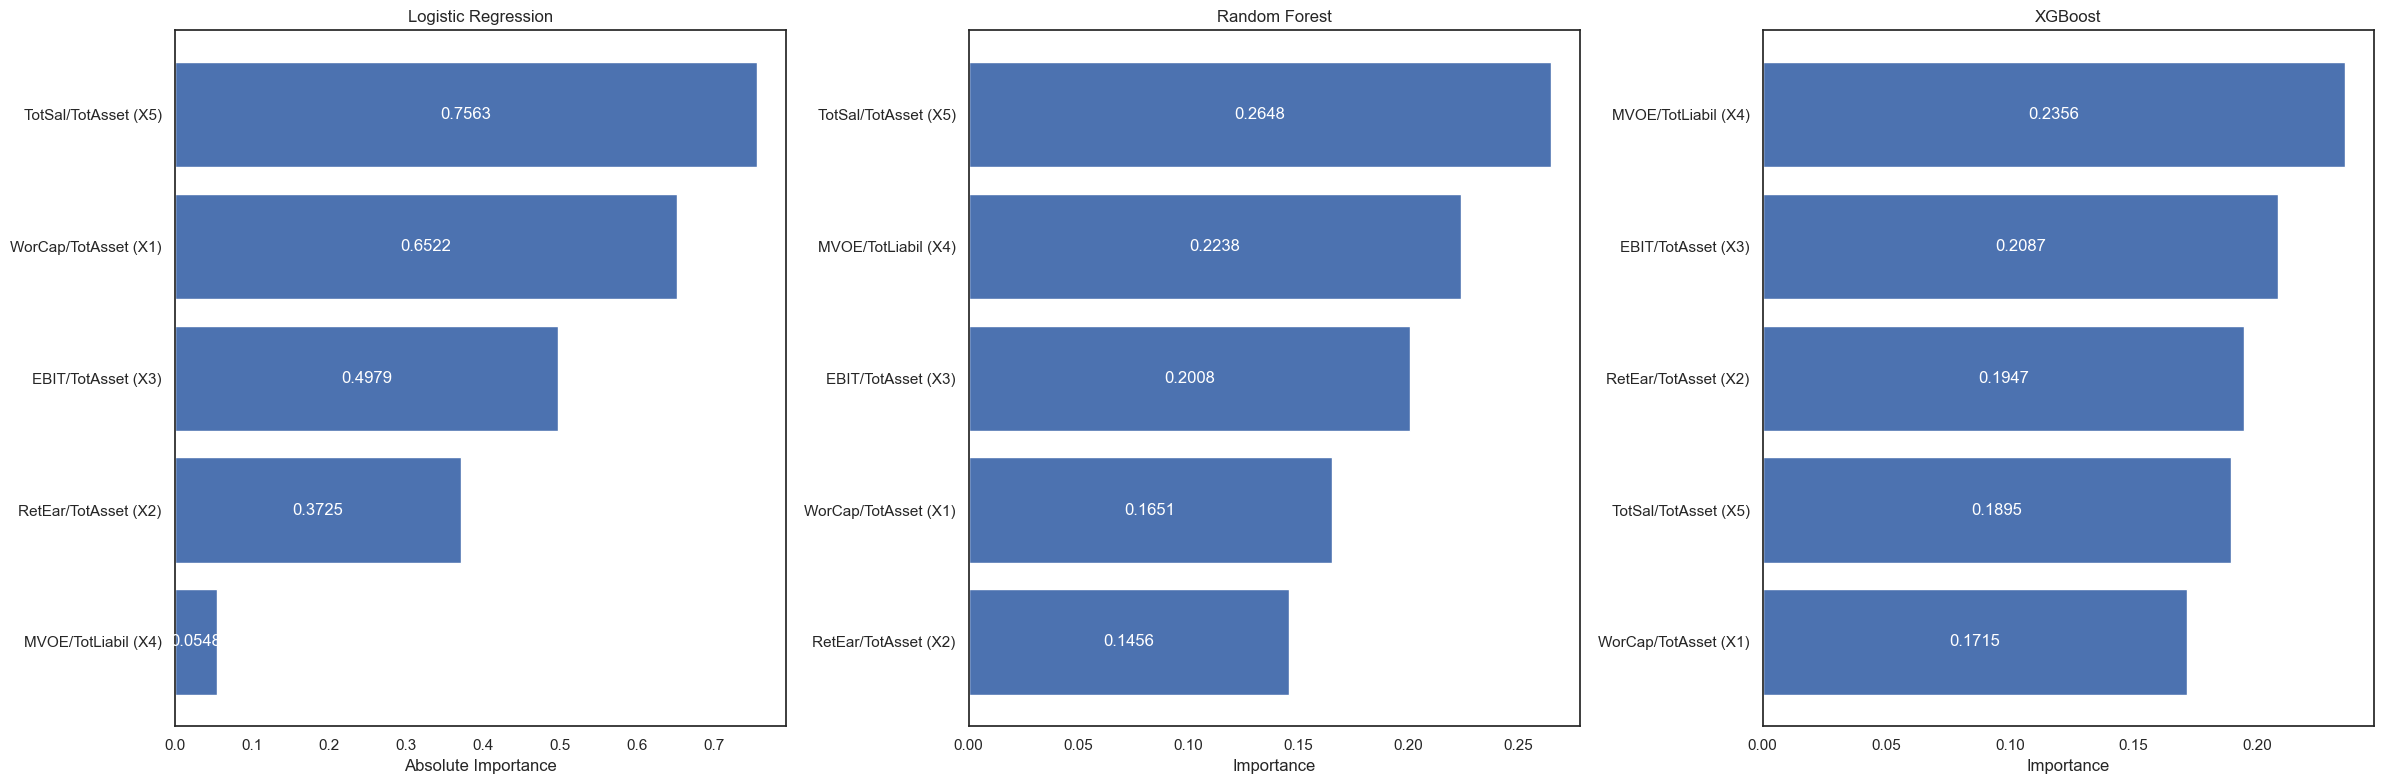

In [125]:
# Logistic Regression Feature Importance
logreg_feature_importance = pd.DataFrame({
    'Feature': X_train_convert.columns,  # Replace with your feature names if it's a DataFrame
    'Absolute Importance': np.abs(logreg.coef_[0])
}).sort_values(by='Absolute Importance', ascending=False)

# Random Forest Feature Importance
rf_feature_importance = pd.DataFrame({
    'Feature': X_train_convert.columns,  # Replace with your feature names if it's a DataFrame
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# XGBoost Feature Importance
xgb_feature_importance = pd.DataFrame({
    'Feature': X_train_convert.columns,  # Replace with your feature names if it's a DataFrame
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualize Feature Importances
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Logistic Regression Feature Importance
axes[0].barh(logreg_feature_importance['Feature'], logreg_feature_importance['Absolute Importance'])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Absolute Importance')
axes[0].invert_yaxis()

# Add values on the bars for Logistic Regression
for i, v in enumerate(logreg_feature_importance['Absolute Importance']):
    axes[0].text(v / 2, i, f"{v:.4f}", va='center', ha='center', color='white', fontsize=12)

# Random Forest Feature Importance
axes[1].barh(rf_feature_importance['Feature'], rf_feature_importance['Importance'])
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Importance')
axes[1].invert_yaxis()

# Add values on the bars for Random Forest
for i, v in enumerate(rf_feature_importance['Importance']):
    axes[1].text(v / 2, i, f"{v:.4f}", va='center', ha='center', color='white', fontsize=12)

# XGBoost Feature Importance
axes[2].barh(xgb_feature_importance['Feature'], xgb_feature_importance['Importance'])
axes[2].set_title('XGBoost')
axes[2].set_xlabel('Importance')
axes[2].invert_yaxis()

# Add values on the bars for XGBoost
for i, v in enumerate(xgb_feature_importance['Importance']):
    axes[2].text(v / 2, i, f"{v:.4f}", va='center', ha='center', color='white', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


### SHAP to interpret feature importance for each model

### Logistic Regression - SHAP

In [126]:
# Calculate SHAP values for Logistic Regression
explainer_logreg = shap.Explainer(logreg, X_train_convert)
shap_values_logreg = explainer_logreg(X_test_convert)
shap_values_logreg.shape

(24821, 5)

In [127]:
X_train.shape

(37230, 5)

In [128]:
X_test.shape

(24821, 5)

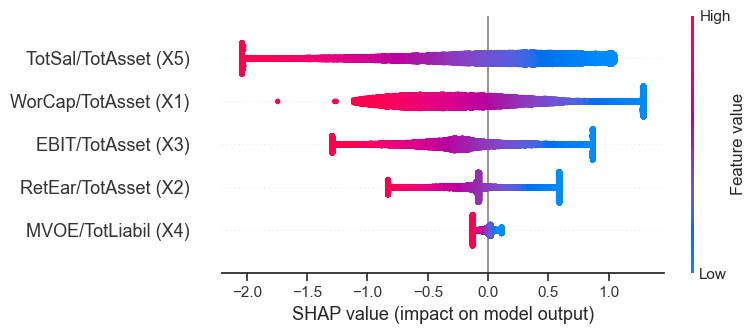

In [129]:
shap.summary_plot(shap_values_logreg, X_test_convert,feature_names=X_train_convert.columns)

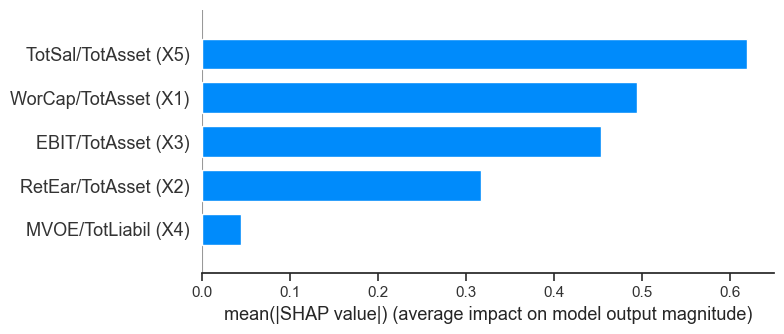

In [130]:
shap.summary_plot(shap_values_logreg, X_test_convert,feature_names=X_train_convert.columns,plot_type="bar")

In [131]:
# Extract SHAP values from shap_values_xgb
shap_values_array_logreg = shap_values_logreg.values  # This will be a 2D array of SHAP values

In [132]:
# Initialize SHAP's JavaScript components
shap.initjs()

# Calculate mean SHAP values
shap_values_logreg_mean = shap_values_array_logreg.mean(axis=0)

# Generate a force plot for the average prediction (mean SHAP values)
shap.force_plot(
    base_value=explainer_logreg.expected_value,  # The expected value (average model output)
    shap_values=shap_values_logreg_mean,         # Mean SHAP values for all samples
    feature_names=X_train_convert.columns        # Feature names
)


In [133]:
# Initialize SHAP's JavaScript components
shap.initjs()

# Calculate mean SHAP values
shap_values_logreg_sum = shap_values_array_logreg.sum(axis=0)

# Generate a force plot for the average prediction (mean SHAP values)
shap.force_plot(
    base_value=explainer_logreg.expected_value,  # The expected value (average model output)
    shap_values=shap_values_logreg_sum,         # Mean SHAP values for all samples
    feature_names=X_train_convert.columns        # Feature names
)


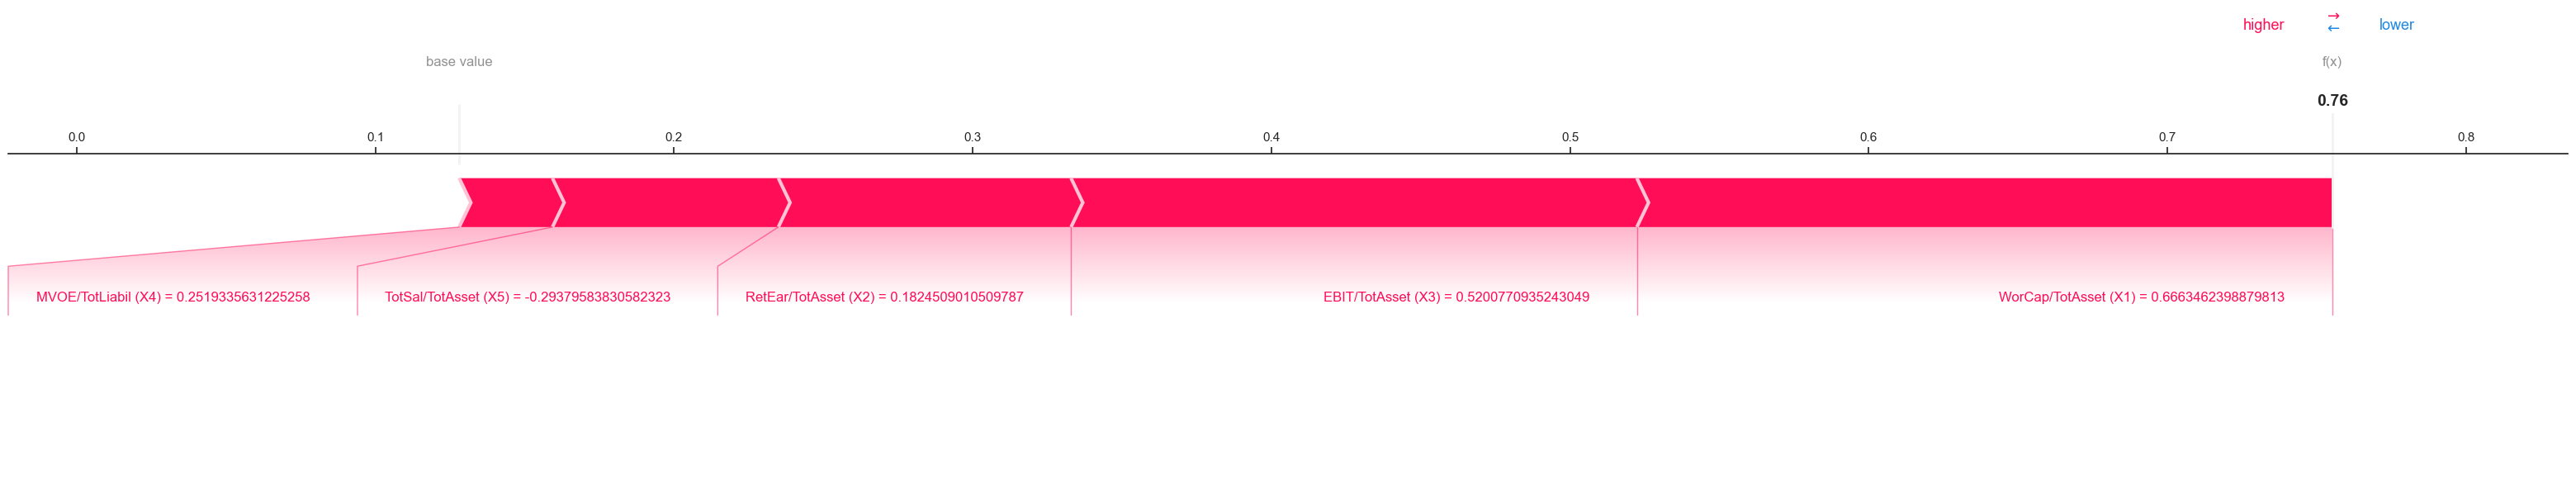

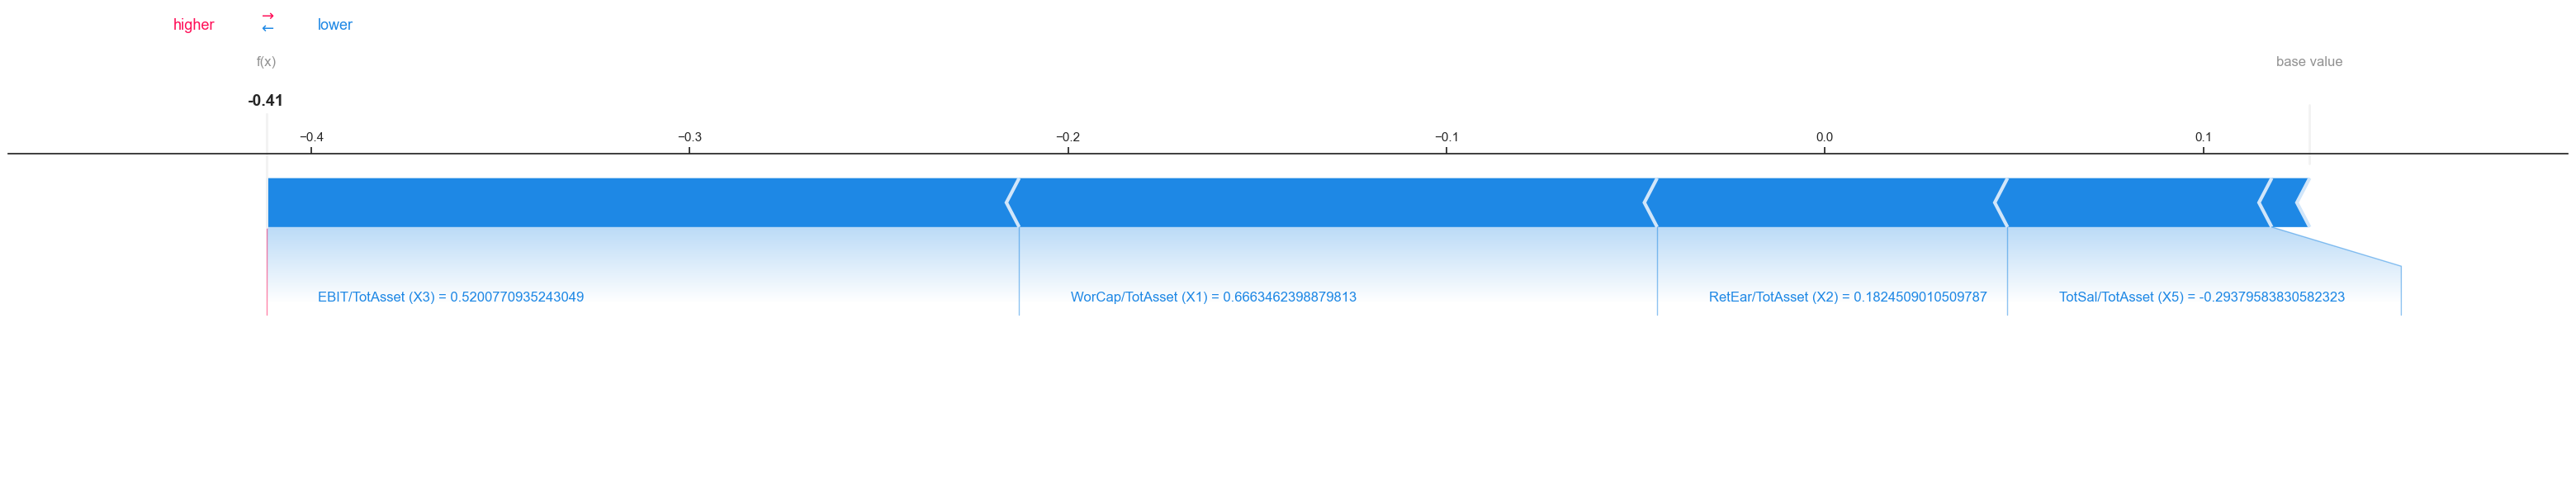

In [134]:
# Reset the index of y_test to align with shap_values positions
y_test_reset = y_test.reset_index(drop=True)

# Use the boolean mask to filter bankrupt and non-bankrupt samples
bankrupt_logreg = shap_values_array_logreg[y_test_reset == 1]
non_bankrupt_logreg = shap_values_array_logreg[y_test_reset == 0]

# Compute the average SHAP values
mean_bankrupt_shap_values_logreg = bankrupt_logreg.mean(axis=0)
mean_non_bankrupt_shap_values_logreg = non_bankrupt_logreg.mean(axis=0)

# Generate SHAP force plot for the average bankrupt sample
shap.force_plot(
    base_value=explainer_logreg.expected_value,  # Scalar expected value
    shap_values=mean_bankrupt_shap_values_logreg,    # Mean SHAP values for bankrupt samples
    features=X_test_convert.iloc[10],                  # Features of any sample
    feature_names=X_test_convert.columns,            # Feature names
    matplotlib=True,                         # Use Matplotlib for plotting
    figsize=(40, 5),                         # Adjust size of the plot
    show=True                                # Display the plot
)

# Generate SHAP force plot for the average non-bankrupt sample
shap.force_plot(
    base_value=explainer_logreg.expected_value,
    shap_values=mean_non_bankrupt_shap_values_logreg,
    features=X_test_convert.iloc[10],
    feature_names=X_test_convert.columns,
    matplotlib=True,
    figsize=(40, 5),
    show=True
)

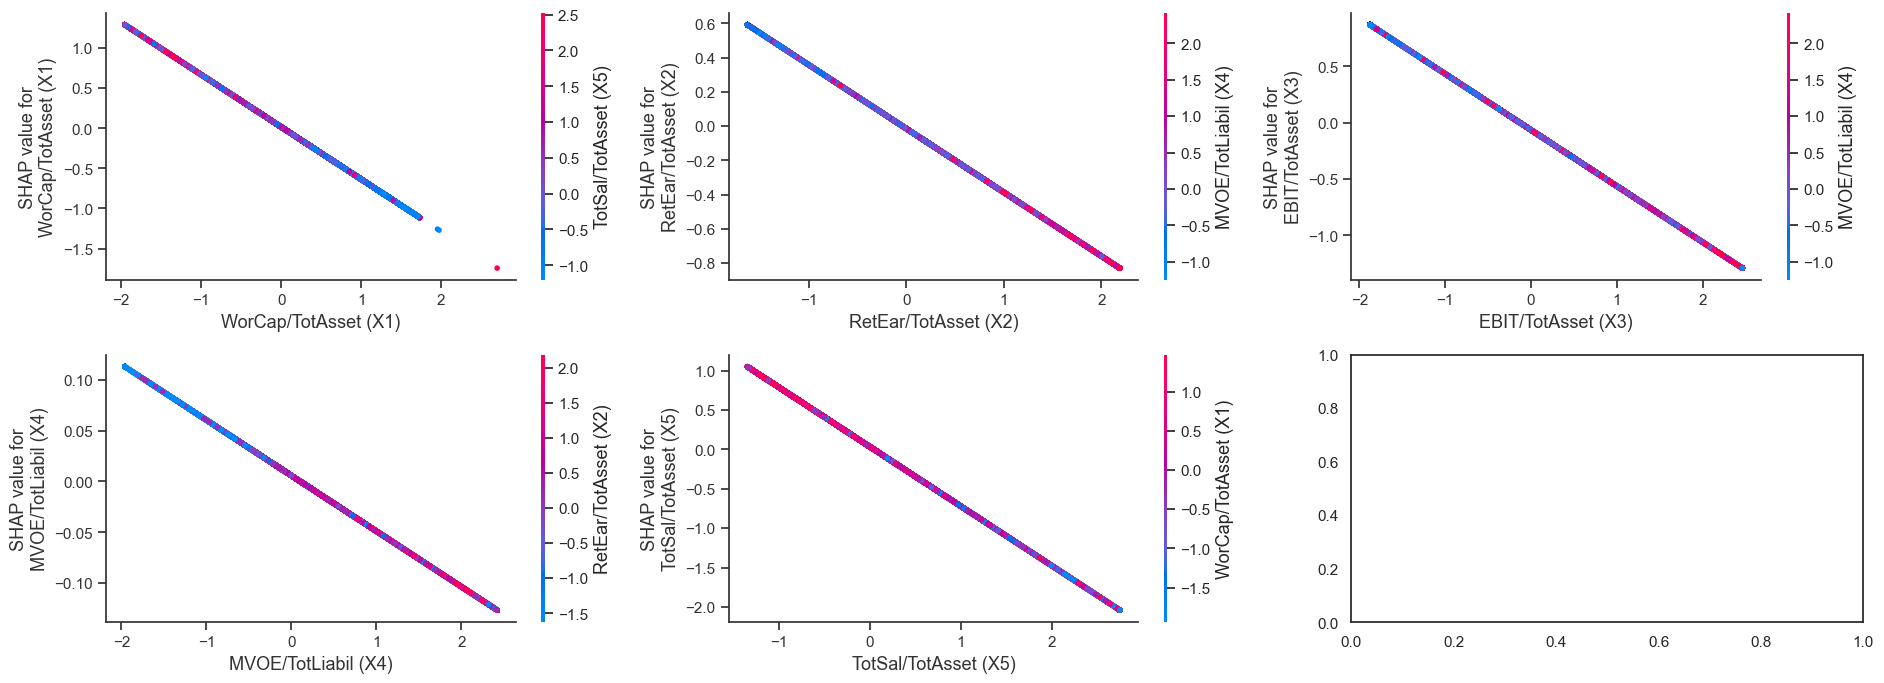

In [135]:
# Create a 1x5 grid of subplots (1 row, 5 columns)
fig, axes = plt.subplots(2, 3, figsize=(19, 7))  # Adjust the figsize to your preference
axes1 = axes.ravel()  # Flatten the axes array for easy indexing

# Loop through the feature indices from 0 to 4 to generate the SHAP dependence plots
for i in range(5):
    # Plot SHAP dependence plot for the current feature on the appropriate subplot
    shap.dependence_plot(
        ind=i,  # Index of the feature
        shap_values=shap_values_array_logreg,  # SHAP values array
        features=X_test_convert,  # The test dataset (features)
        feature_names=X_test_convert.columns,  # Feature names for axis labeling
        show=False,  # Don't show the plot immediately
        ax=axes1[i]  # Assign the plot to the corresponding axis in the grid
    )

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


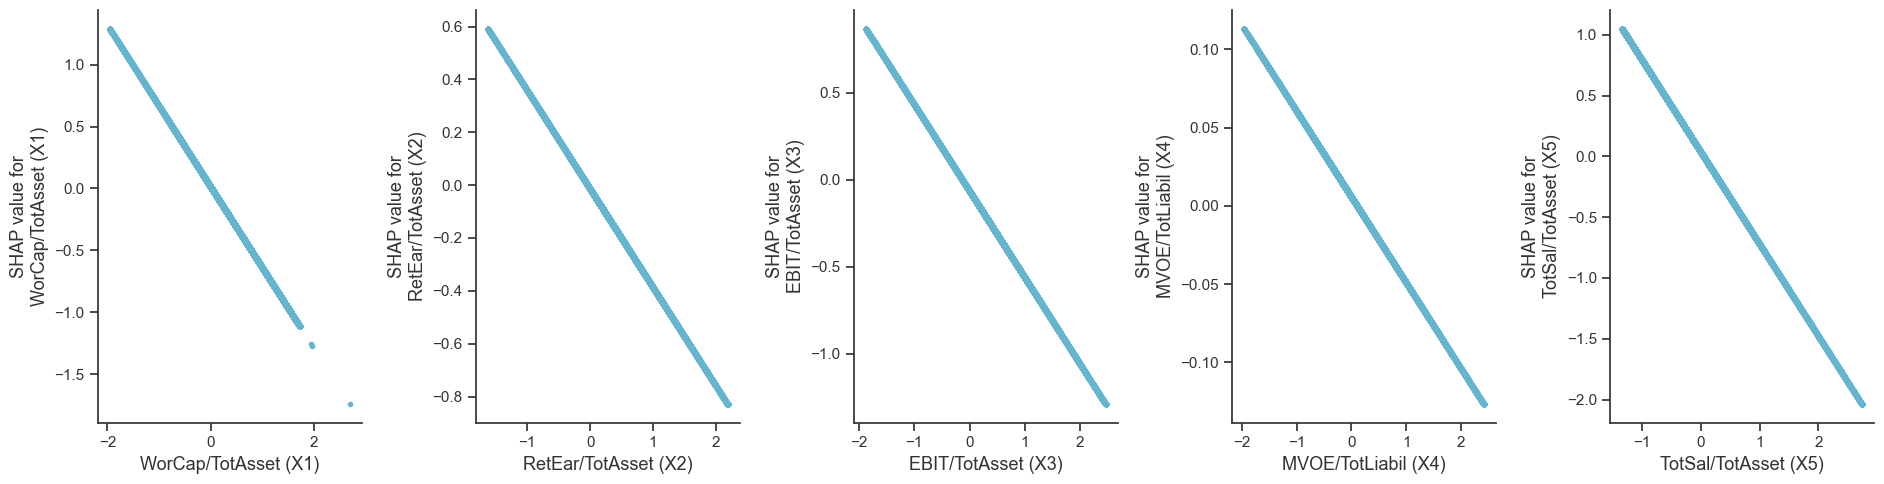

In [136]:
# Create a 2x3 grid of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(1, 5, figsize=(19, 5))  # Adjust figsize as needed
axes0 = axes.ravel()  # Flatten the axes array for easy indexing

# Loop through the feature indices from 0 to 4 (since we have 5 features)
for i in range(5):
    # Plot SHAP dependence plot for the current feature on the appropriate subplot
    shap.dependence_plot(
        ind=i,  # Index of the feature
        shap_values=shap_values_array_logreg,  # SHAP values array
        color="c",  # Customize the color of the plot
        features=X_test_convert,  # The test dataset (features)
        feature_names=X_test_convert.columns,  # Feature names for axis labeling
        interaction_index=None,  # Remove interaction feature
        show=False,  # Don't show the plot immediately
        ax=axes0[i]  # Assign the plot to the corresponding axis in the grid
    )

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

### XGB MODEL - SHAP

In [137]:
# Calculate SHAP values for XGB
explainer_xgb = shap.Explainer(xgb_tuned, X_train_convert) 
shap_values_xgb = explainer_xgb(X_test_convert)

100%|===================| 24820/24821 [68:21<00:00]        

In [163]:
shap_values_xgb.shape

(24821, 5)

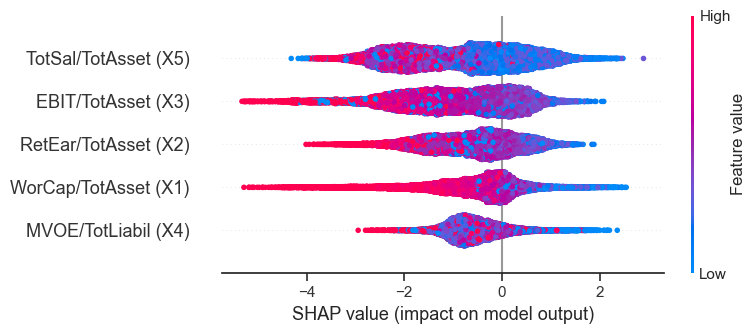

In [139]:
# SHAP summary plot for feature importance
shap.summary_plot(shap_values_xgb, X_test_convert,feature_names=X_train_convert.columns)

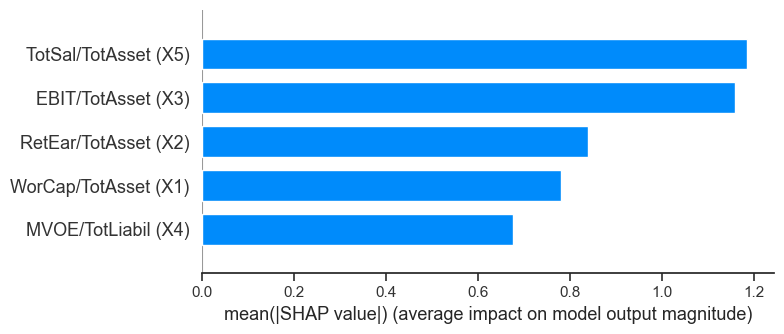

In [140]:
# SHAP summary plot for feature importance
shap.summary_plot(shap_values_xgb, X_test_convert,feature_names=X_train_convert.columns,plot_type="bar")

In [141]:
 # Extract SHAP values
shap_values_array_xgb = shap_values_xgb.values  # SHAP values array (2D)

In [142]:
# Initialize SHAP's JavaScript components
shap.initjs()
shap_values_xgb_mean = shap_values_array_xgb.mean(axis=0)

# Generate a force plot for the average prediction (mean SHAP values)
shap.force_plot(
    base_value=explainer_xgb.expected_value,  # The expected value (average model output)
    shap_values=shap_values_xgb_mean,                # Mean SHAP values for all samples
    feature_names=X_train_convert.columns               # Feature names
)

In [143]:
# Initialize SHAP's JavaScript components
shap.initjs()
shap_values_xgb_sum = shap_values_array_xgb.sum(axis=0)

# Generate a force plot for the average prediction (mean SHAP values)
shap.force_plot(
    base_value=explainer_xgb.expected_value,  # The expected value (average model output)
    shap_values=shap_values_xgb_sum,                # Mean SHAP values for all samples
    feature_names=X_train_convert.columns               # Feature names
)

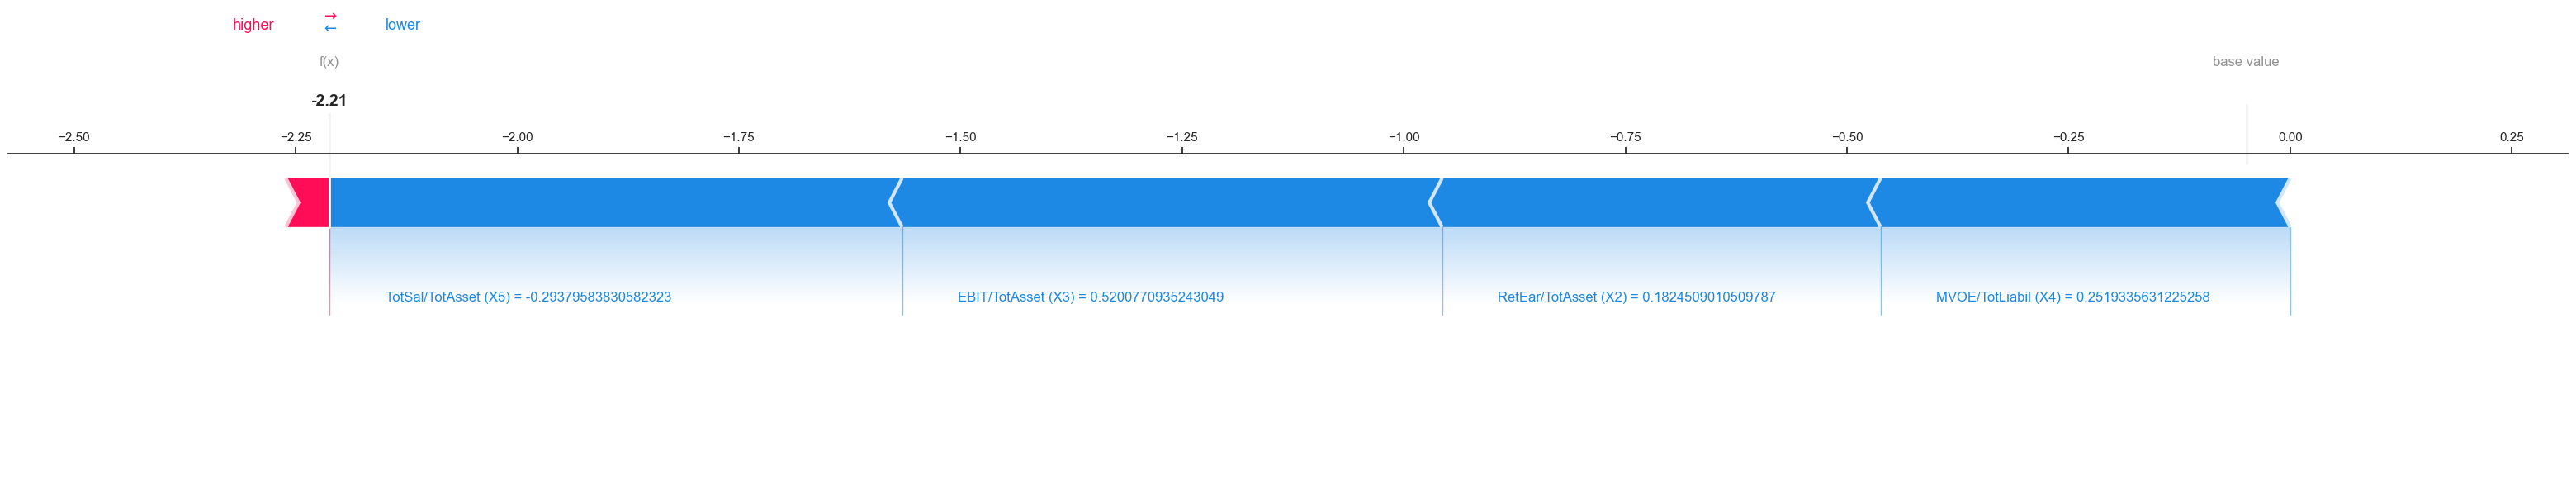

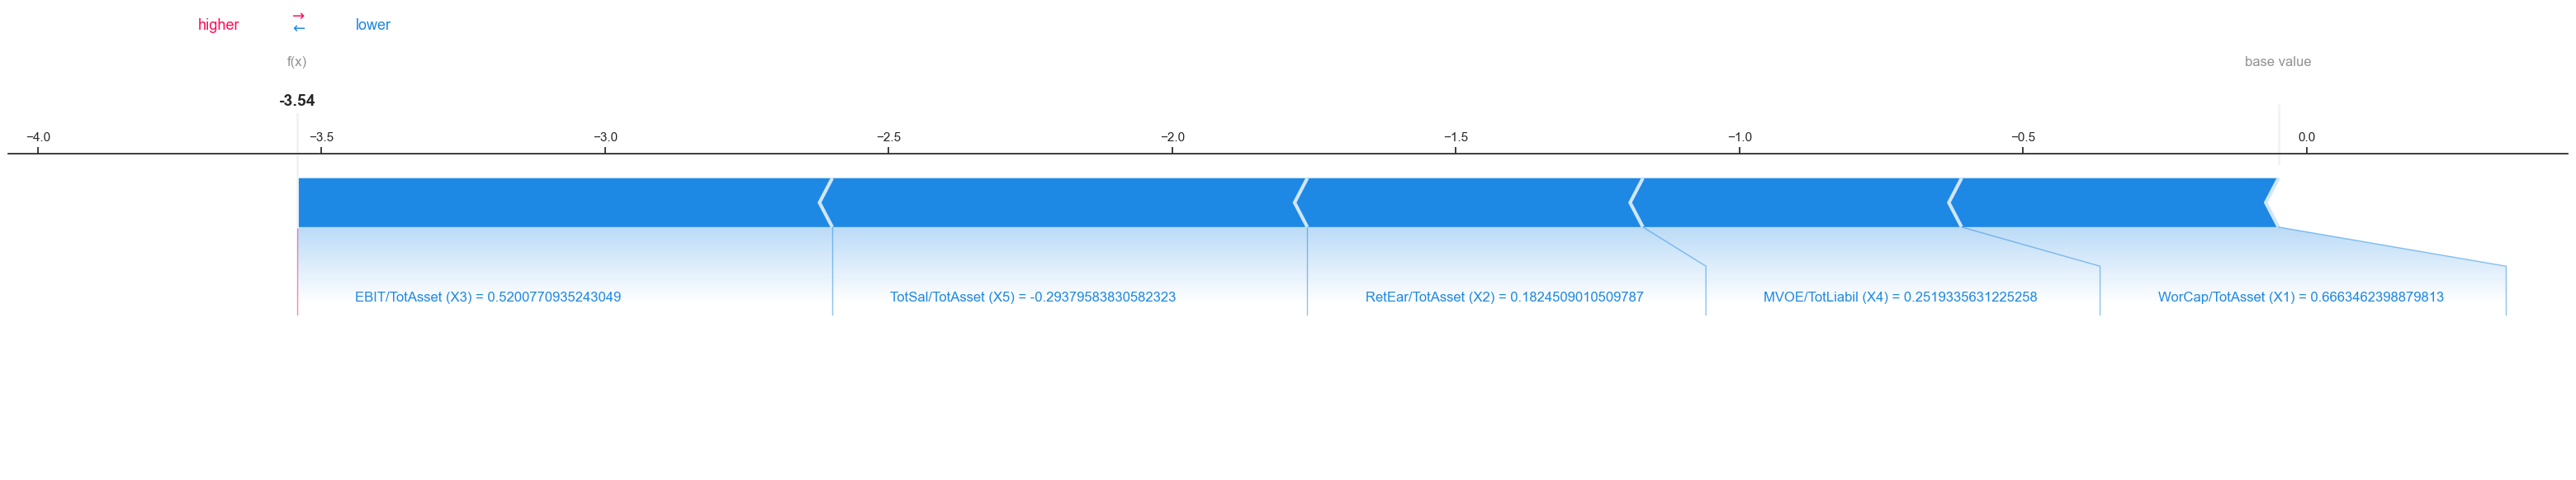

In [144]:
# Use the boolean mask to filter bankrupt and non-bankrupt samples
bankrupt_xgb = shap_values_array_xgb[y_test_reset == 1]
non_bankrupt_xgb = shap_values_array_xgb[y_test_reset == 0]

# Compute the average SHAP values
mean_bankrupt_shap_values_xgb = bankrupt_xgb.mean(axis=0)
mean_non_bankrupt_shap_values_xgb = non_bankrupt_xgb.mean(axis=0)

# Generate SHAP force plot for the average bankrupt sample
shap.force_plot(
    base_value=explainer_xgb.expected_value,  # Scalar expected value
    shap_values=mean_bankrupt_shap_values_xgb,    # Mean SHAP values for bankrupt samples
    features=X_test_convert.iloc[10],                  # Features of any sample
    feature_names=X_test_convert.columns,            # Feature names
    matplotlib=True,                         # Use Matplotlib for plotting
    figsize=(40, 5),                         # Adjust size of the plot
    show=True                                # Display the plot
)

# Generate SHAP force plot for the average non-bankrupt sample
shap.force_plot(
    base_value=explainer_xgb.expected_value,
    shap_values=mean_non_bankrupt_shap_values_xgb,
    features=X_test_convert.iloc[10],
    feature_names=X_test_convert.columns,
    matplotlib=True,
    figsize=(40, 5),
    show=True
)

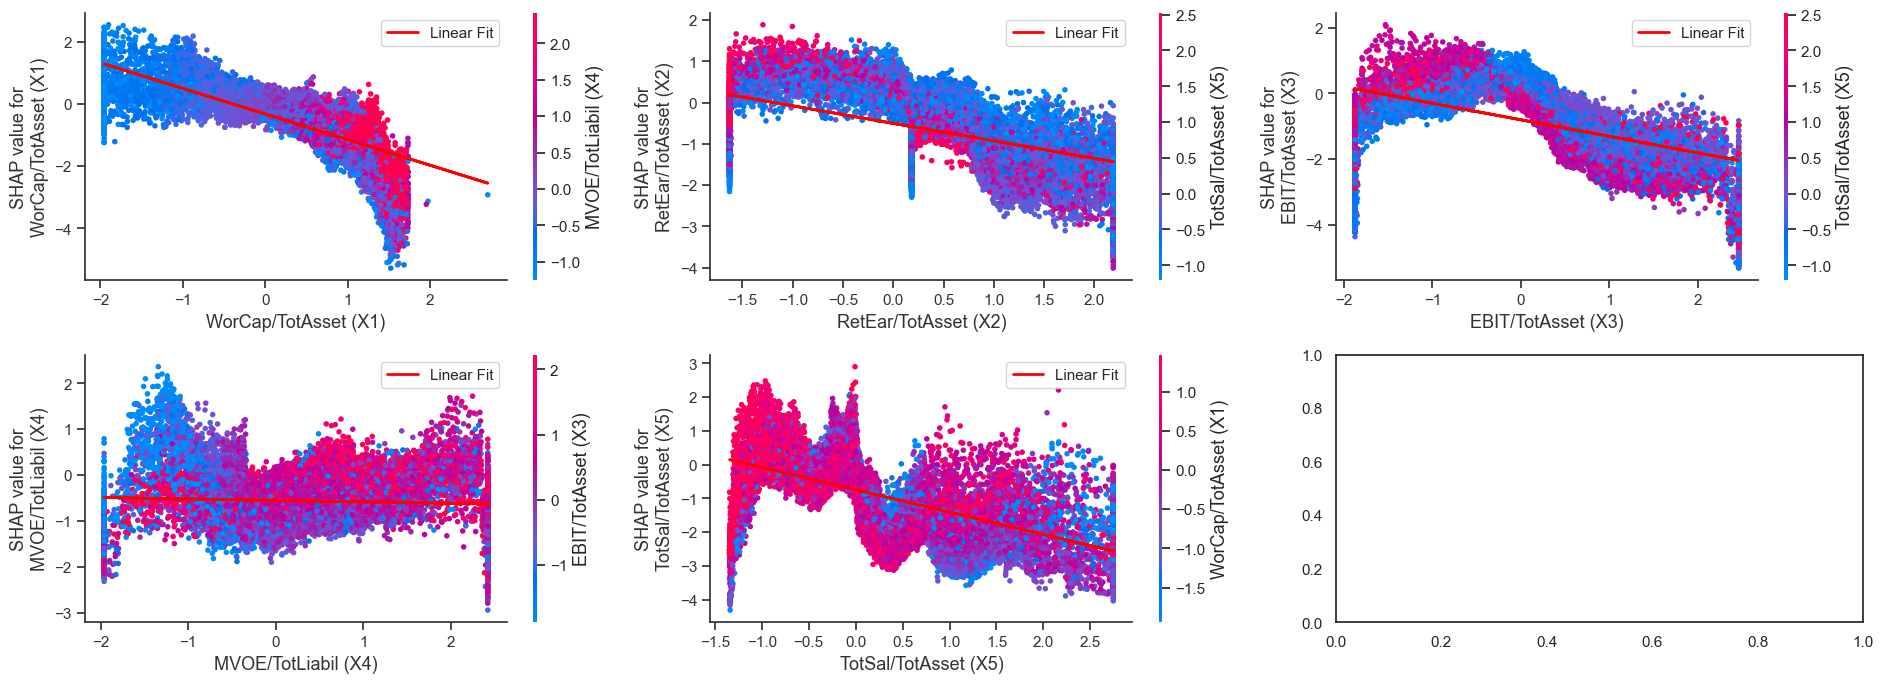

In [145]:
# Create a grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(19, 7))  # Adjust as needed
axes2 = axes.ravel()  # Flatten the axes array

# Loop through the features
for i in range(5):
    # Plot the SHAP dependence plot for the feature
    shap.dependence_plot(
        ind=i,  # Index of the feature
        shap_values=shap_values_array_xgb,  # SHAP values array
        features=X_test_convert,  # Feature values
        feature_names=X_test_convert.columns,  # Column names for features
        show=False,  # Avoid immediate display
        ax=axes2[i]  # Assign the plot to the axis
    )
    
    # Get SHAP values and feature values for the current feature
    shap_values = shap_values_array_xgb[:, i]
    feature_values = X_test_convert.iloc[:, i].values
    
    # Fit a linear regression line
    reg = LinearRegression().fit(feature_values.reshape(-1, 1), shap_values)
    linear_line = reg.predict(feature_values.reshape(-1, 1))
    
    # Plot the linear regression line
    axes2[i].plot(
        feature_values, linear_line, color="red", linewidth=2, label="Linear Fit"
    )
    axes2[i].legend()  # Add legend to indicate the linear fit

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


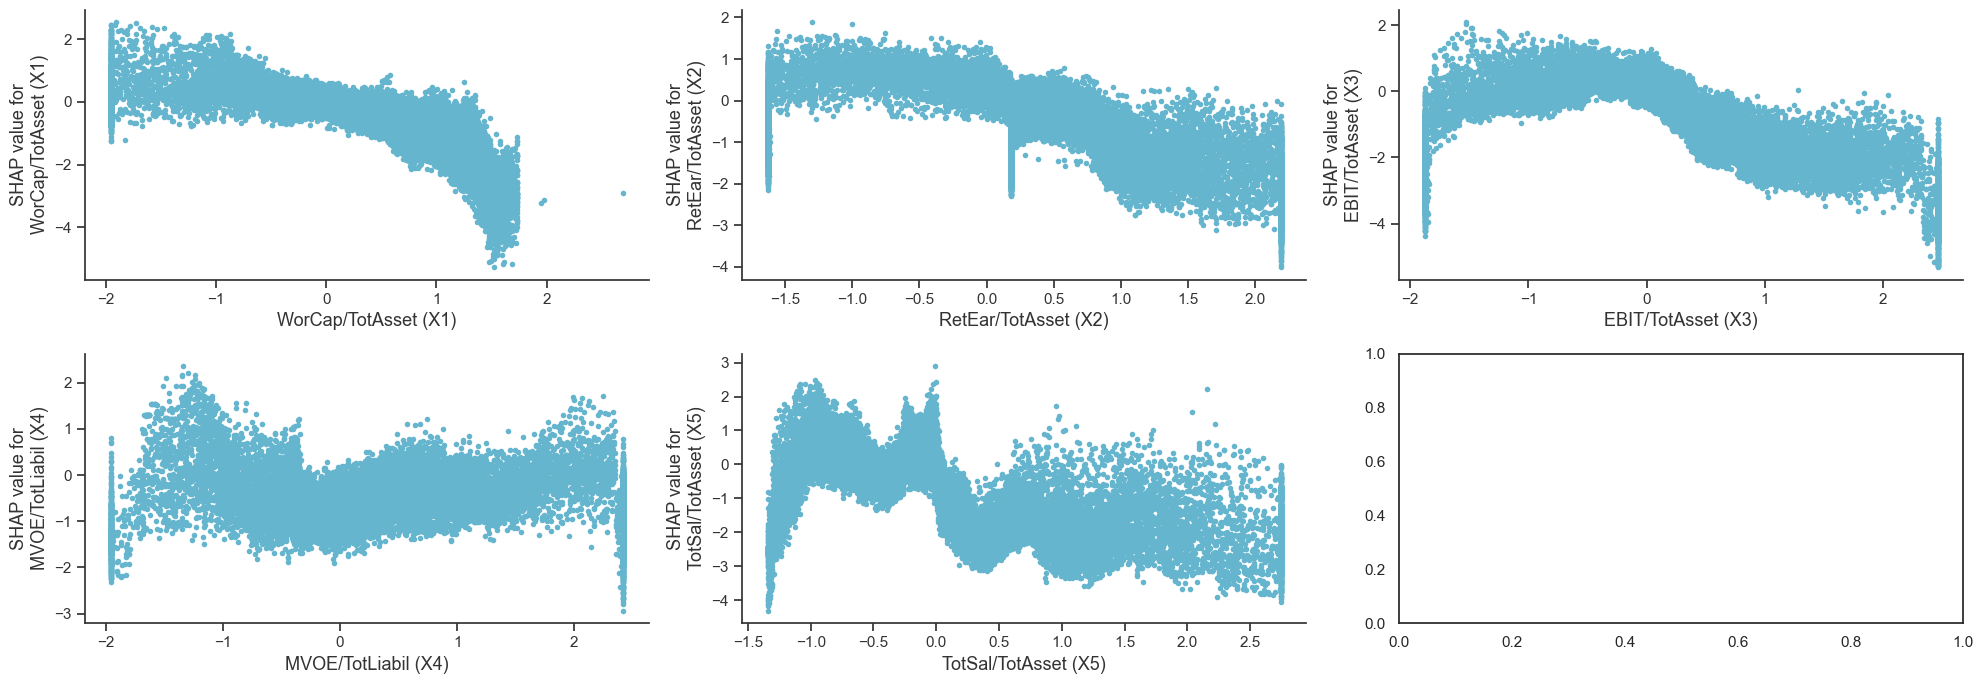

In [146]:
# Create a 2x3 grid of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(20, 7))  # Adjust figsize as needed
axes3 = axes.ravel()  # Flatten the axes array for easy indexing

# Loop through the feature indices from 0 to 4 (since we have 5 features)
for i in range(5):
    # Plot SHAP dependence plot for the current feature on the appropriate subplot
    shap.dependence_plot(
        ind=i,  # Index of the feature
        shap_values=shap_values_array_xgb,  # SHAP values array
        color="c",  # Customize the color of the plot
        features=X_test_convert,  # The test dataset (features)
        feature_names=X_test_convert.columns,  # Feature names for axis labeling
        interaction_index=None,  # Remove interaction feature
        show=False,  # Don't show the plot immediately
        ax=axes3[i]  # Assign the plot to the corresponding axis in the grid
    )

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

### Random Forest - SHAP

In [161]:
# Create SHAP explainer for the Random Forest model
explainer_rf = shap.TreeExplainer(rf)

# Get SHAP values for the test set
shap_values_rf = explainer_rf.shap_values(X_test_convert)

In [148]:
shap_values_rf.shape

(24821, 5, 2)

Shape of summed SHAP values: (24821, 5)
Shape of X_test: (24821, 5)


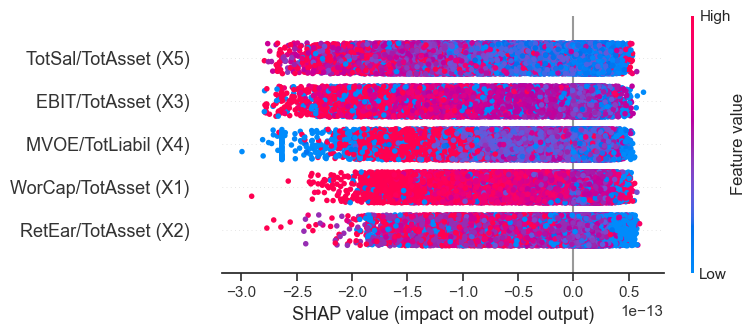

In [149]:
# Collapse SHAP values across classes for binary classification (summing over class dimension)
shap_values_sum_rf = shap_values_rf.sum(axis=2)  # Summing across the class dimension (axis=2)

# Ensure the shape is (n_samples, n_features)
print(f"Shape of summed SHAP values: {shap_values_sum_rf.shape}")

# Verify that the shape of the summed SHAP values matches X_test_scaled
print(f"Shape of X_test: {X_test_convert.shape}")

# Plot the SHAP summary for the summed values
shap.summary_plot(shap_values_sum_rf, X_test_convert, feature_names=X_train_convert.columns)



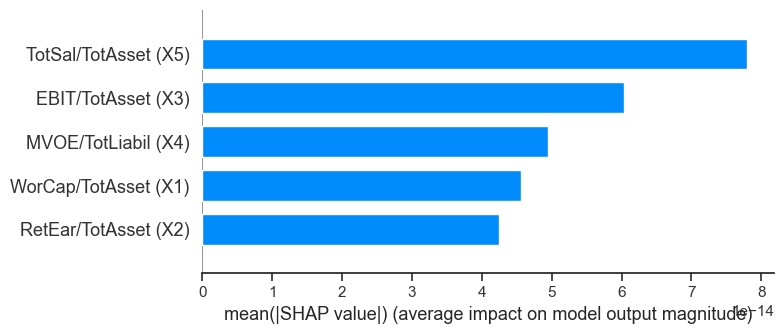

In [150]:
# Plot the SHAP summary for the summed values
shap.summary_plot(shap_values_sum_rf, X_test_convert, feature_names=X_train_convert.columns,plot_type="bar")

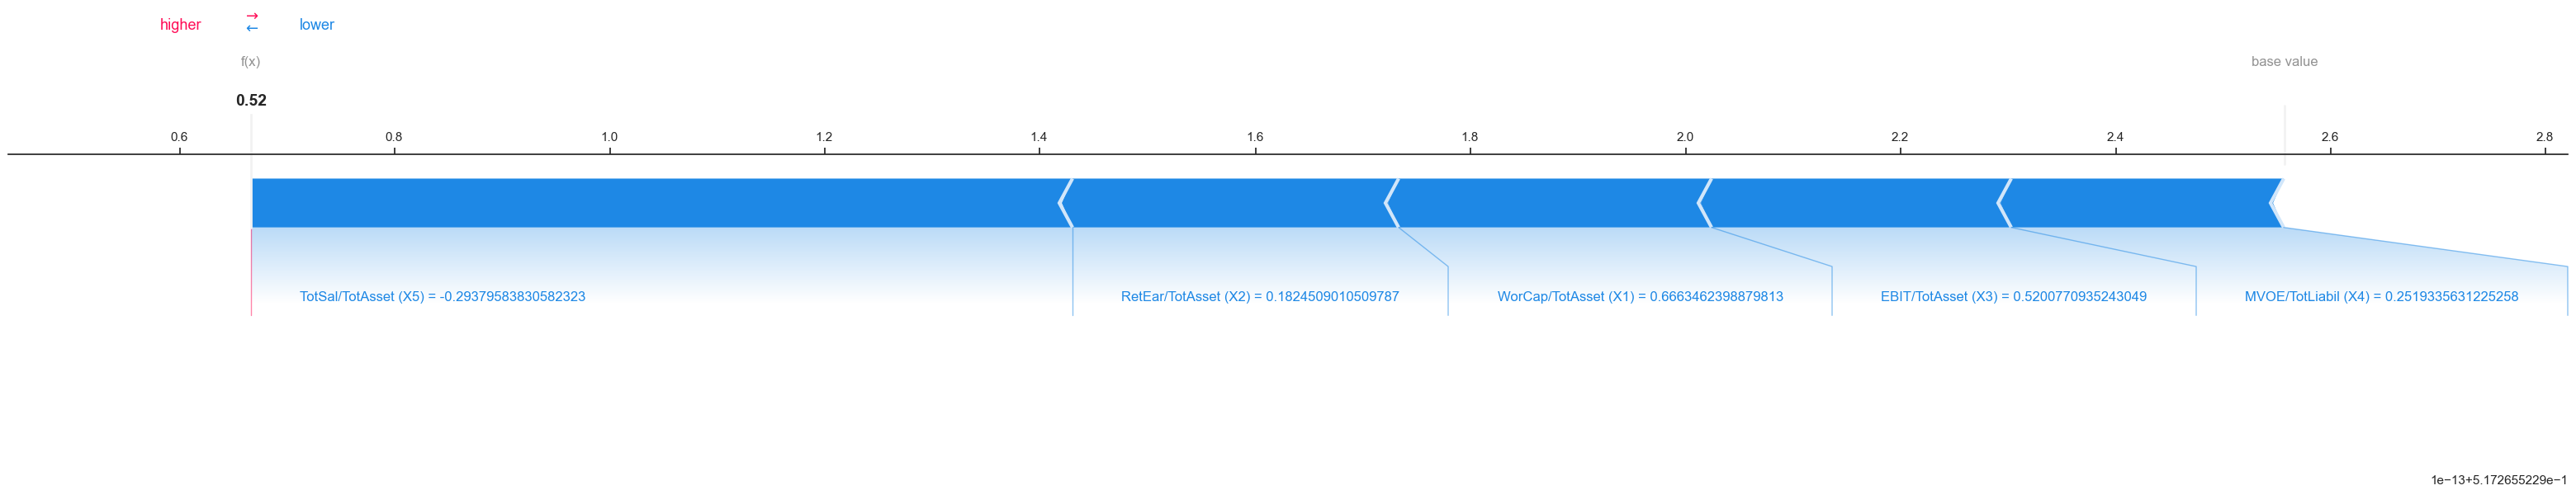

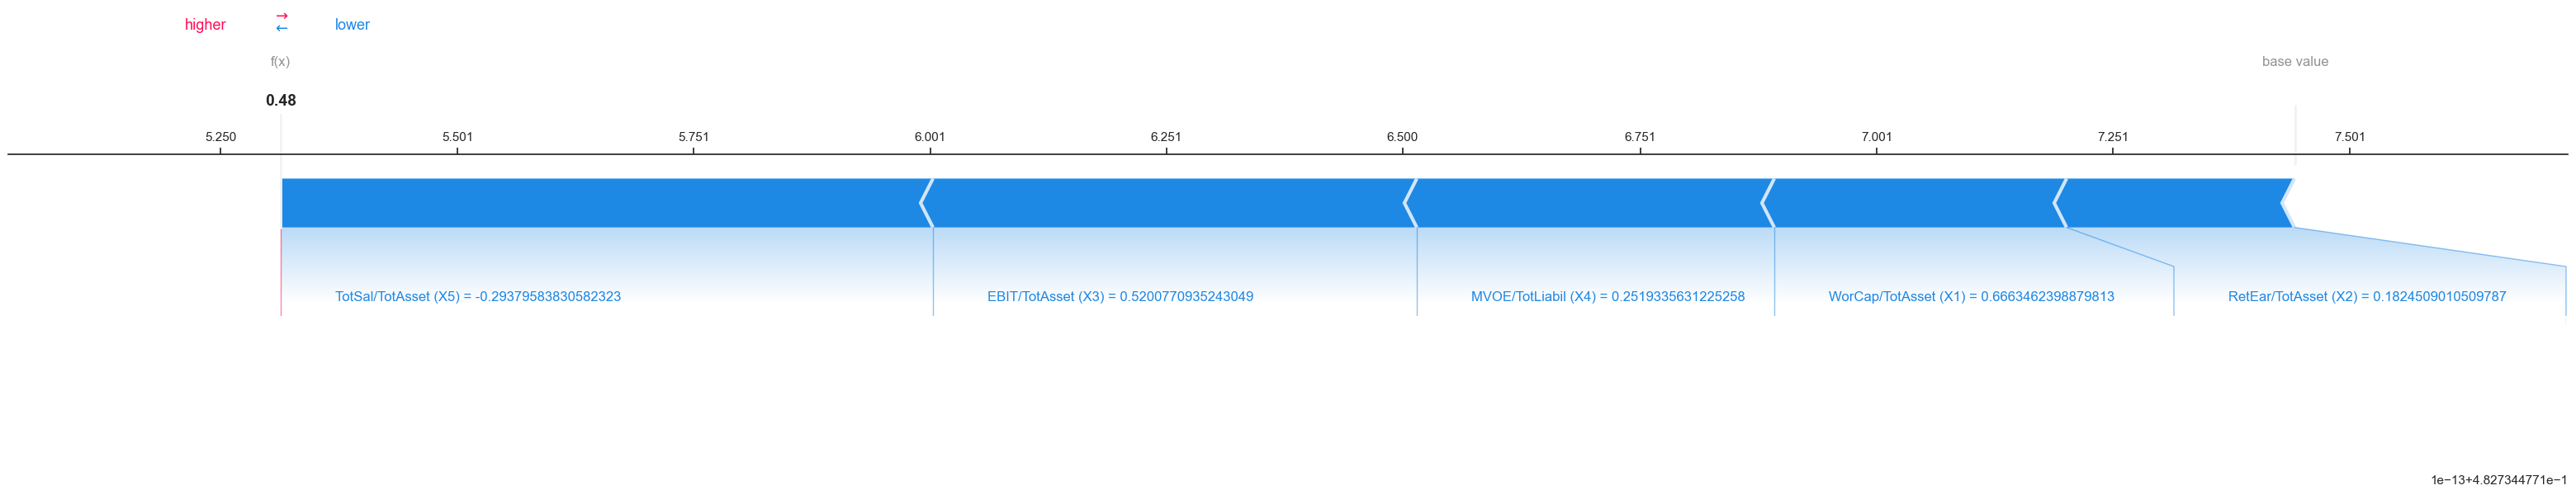

In [151]:
# Step 1: Filter bankrupt and non-bankrupt samples for Random Forest
bankrupt_rf = shap_values_sum_rf[y_test_reset == 1]
non_bankrupt_rf = shap_values_sum_rf[y_test_reset == 0]

# Step 2: Compute the average SHAP values for each group
mean_bankrupt_shap_values_rf = bankrupt_rf.mean(axis=0)  # Mean SHAP values for bankrupt samples
mean_non_bankrupt_shap_values_rf = non_bankrupt_rf.mean(axis=0)  # Mean SHAP values for non-bankrupt samples

# Step 3: Generate SHAP force plot for the average bankrupt sample
shap.force_plot(
    base_value=explainer_rf.expected_value[1],  # Base value for class 1 (bankrupt)
    shap_values=mean_bankrupt_shap_values_rf,   # Mean SHAP values for bankrupt samples
    features=X_test_convert.iloc[10],                   # Features of any sample (used for visualization, doesn't affect SHAP)
    feature_names=X_test_convert.columns,              # Feature names
    matplotlib=True,                           # Use Matplotlib for plotting
    figsize=(40, 5),                           # Plot size
    show=True                                  # Display the plot
)

# Step 4: Generate SHAP force plot for the average non-bankrupt sample
shap.force_plot(
    base_value=explainer_rf.expected_value[0],  # Base value for class 0 (non-bankrupt)
    shap_values=mean_non_bankrupt_shap_values_rf,  # Mean SHAP values for non-bankrupt samples
    features=X_test_convert.iloc[10],                   # Features of any sample
    feature_names=X_test_convert.columns,              # Feature names
    matplotlib=True,                           # Use Matplotlib for plotting
    figsize=(40, 5),                           # Plot size
    show=True                                  # Display the plot
)

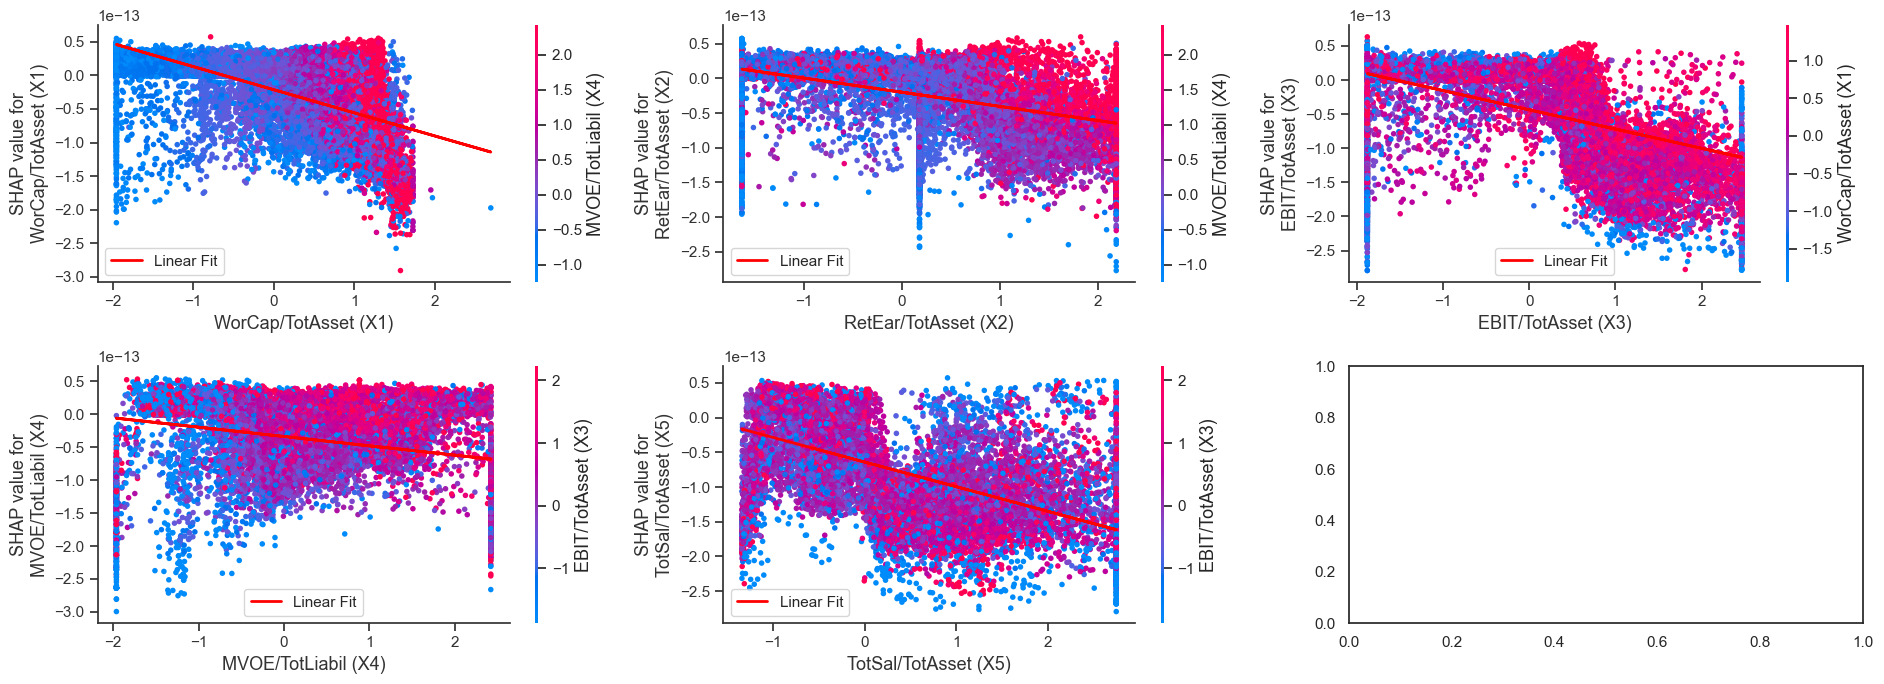

In [152]:
# Create a grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(19, 7))  # Adjust the figsize as needed
axes4 = axes.ravel()  # Flatten the axes array

# Loop through the feature indices
for i in range(5):
    # Plot the SHAP dependence plot for the feature
    shap.dependence_plot(
        ind=i,  # Index of the feature
        shap_values=shap_values_sum_rf,  # SHAP values array
        features=X_test_convert,  # Feature values
        feature_names=X_test_convert.columns,  # Column names for features
        show=False,  # Avoid immediate display
        ax=axes4[i]  # Assign the plot to the axis
    )
    
    # Get SHAP values and feature values for the current feature
    shap_values = shap_values_sum_rf[:, i]
    feature_values = X_test_convert.iloc[:, i].values
    
    # Fit a linear regression line
    reg = LinearRegression().fit(feature_values.reshape(-1, 1), shap_values)
    linear_line = reg.predict(feature_values.reshape(-1, 1))
    
    # Plot the linear regression line
    axes4[i].plot(
        feature_values, linear_line, color="red", linewidth=2, label="Linear Fit"
    )
    axes4[i].legend()  # Add legend to indicate the linear fit

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


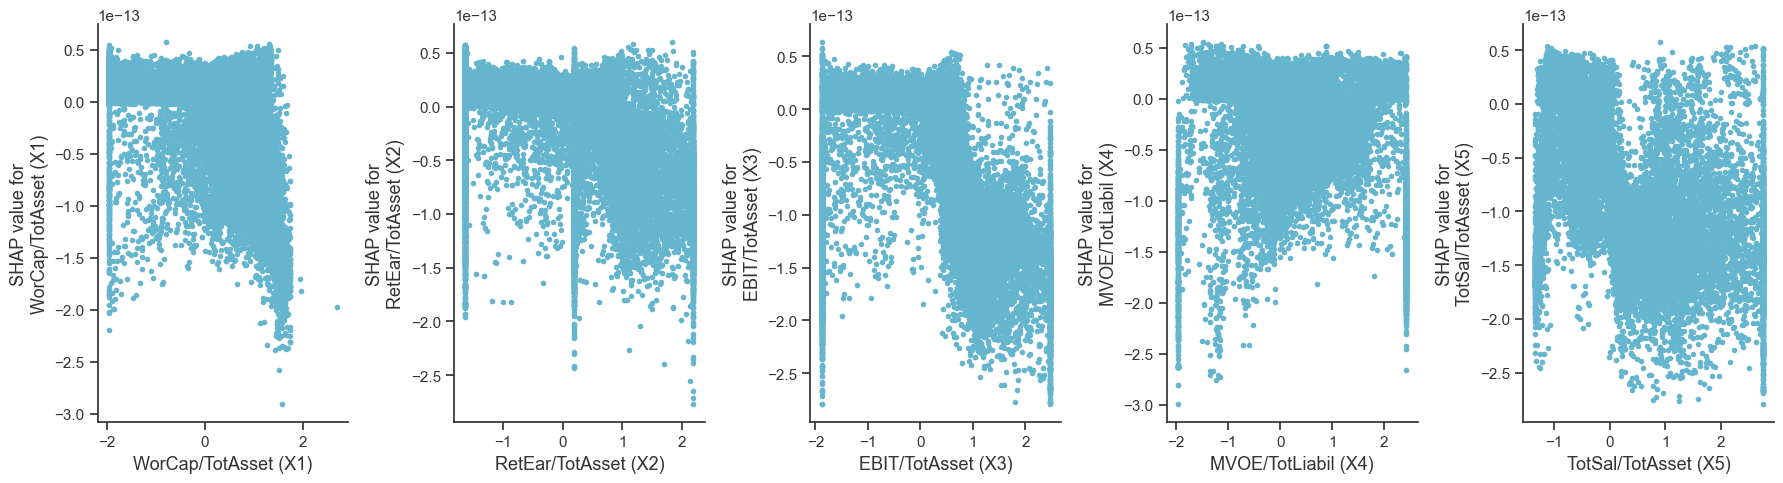

In [153]:
# Create a 2x3 grid of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(1, 5, figsize=(18, 5))  # Adjust figsize as needed
axes5 = axes.ravel()  # Flatten the axes array for easy indexing

# Loop through the feature indices from 0 to 4 (since we have 5 features)
for i in range(5):
    # Plot SHAP dependence plot for the current feature on the appropriate subplot
    shap.dependence_plot(
        ind=i,  # Index of the feature
        shap_values=shap_values_sum_rf,  # SHAP values array
        color="c",  # Customize the color of the plot
        features=X_test_convert,  # The test dataset (features)
        feature_names=X_test_convert.columns,  # Feature names for axis labeling
        interaction_index=None,  # Remove interaction feature
        show=False,  # Don't show the plot immediately
        ax=axes5[i]  # Assign the plot to the corresponding axis in the grid
    )

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

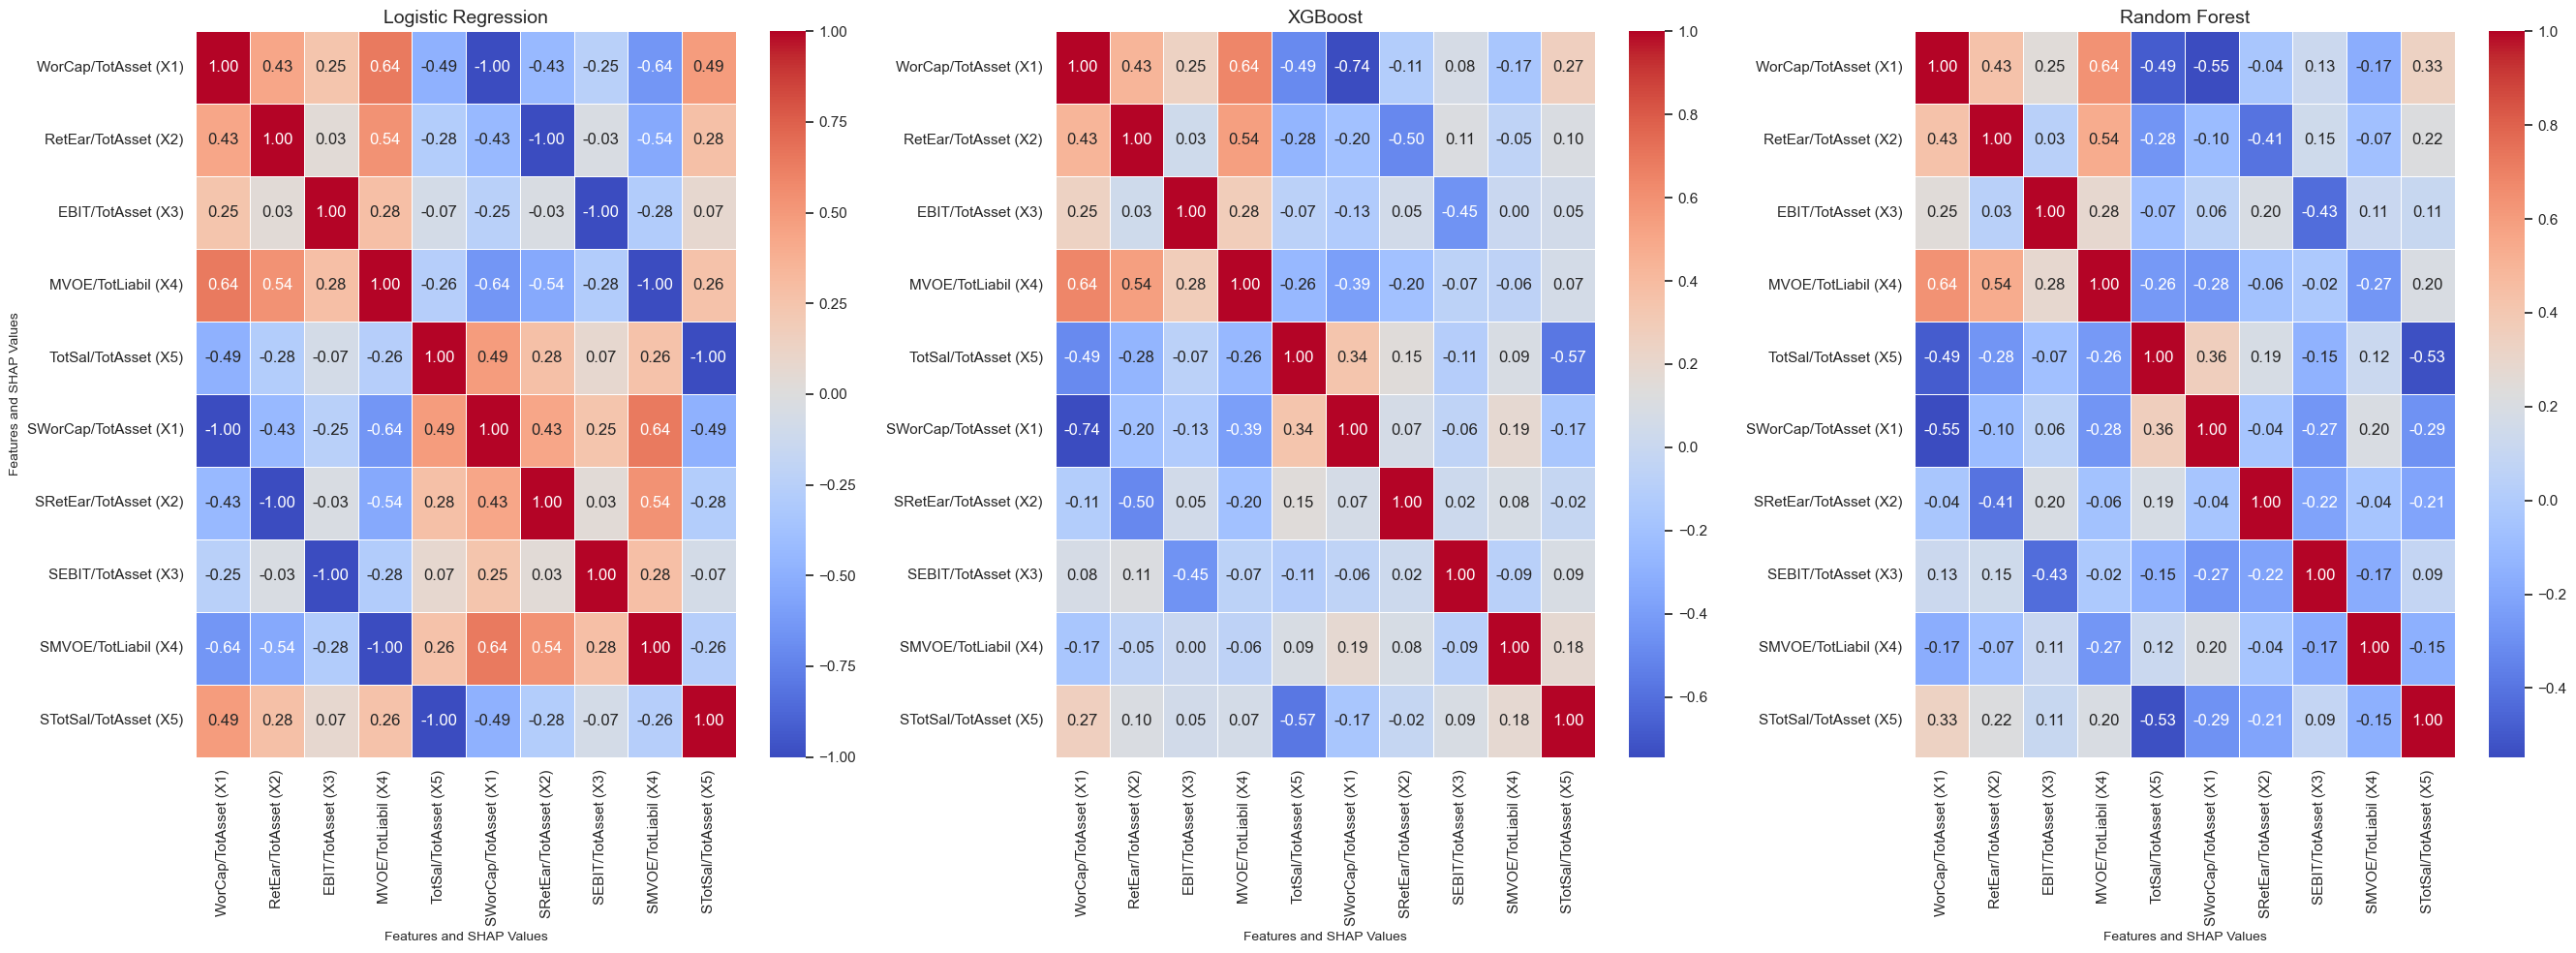

In [154]:
# Create a figure for side-by-side heatmaps
fig, axes = plt.subplots(1, 3, figsize=(27, 10))  # 1 row, 3 columns

# Logistic Regression SHAP values
shap_values_logreg1 = pd.DataFrame(shap_values_array_logreg, columns=X_test_convert.columns)
combined_df_logreg = pd.concat([X_test_convert, shap_values_logreg1.add_prefix("S")], axis=1)
correlation_matrix_logreg = combined_df_logreg.corr()
sb.heatmap(
    correlation_matrix_logreg,
    annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, ax=axes[0]  # annot=True to display numbers
)
axes[0].set_title("Logistic Regression", fontsize=14)
axes[0].set_xlabel("Features and SHAP Values", fontsize=10)
axes[0].set_ylabel("Features and SHAP Values", fontsize=10)

# XGB SHAP values
shap_values_xgb1 = pd.DataFrame(shap_values_array_xgb, columns=X_test_convert.columns)
combined_df_xgb = pd.concat([X_test_convert, shap_values_xgb1.add_prefix("S")], axis=1)
correlation_matrix_xgb = combined_df_xgb.corr()
sb.heatmap(
    correlation_matrix_xgb,
    annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, ax=axes[1]  # annot=True to display numbers
)
axes[1].set_title("XGBoost", fontsize=14)
axes[1].set_xlabel("Features and SHAP Values", fontsize=10)
axes[1].set_ylabel("")

# Random Forest SHAP values
shap_values_rf1 = pd.DataFrame(shap_values_sum_rf, columns=X_test_convert.columns)
combined_df_rf = pd.concat([X_test_convert, shap_values_rf1.add_prefix("S")], axis=1)
correlation_matrix_rf = combined_df_rf.corr()
sb.heatmap(
    correlation_matrix_rf,
    annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, ax=axes[2]  # annot=True to display numbers
)
axes[2].set_title("Random Forest", fontsize=14)
axes[2].set_xlabel("Features and SHAP Values", fontsize=10)
axes[2].set_ylabel("")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [155]:
# Calculate SHAP importance (sum of absolute SHAP values for each feature)
shap_importance_logreg = shap_values_logreg1.abs().sum()

# Convert to a DataFrame for easy ranking
shap_importance_df_logreg = pd.DataFrame(shap_importance_logreg, columns=['Importance'])
shap_importance_df_logreg['Feature'] = X_test_convert.columns
shap_importance_df_logreg = shap_importance_df_logreg.sort_values(by='Importance', ascending=False)
print('----------------------- Logistic Regression ------------------------')

# Add ranking
shap_importance_df_logreg['Rank'] = range(1, len(shap_importance_df_logreg) + 1)

# Print results
print(shap_importance_df_logreg[['Feature', 'Importance', 'Rank']])

# Calculate SHAP importance (sum of absolute SHAP values for each feature)
shap_importance_xgb = shap_values_xgb1.abs().sum()

# Convert to a DataFrame for easy ranking
shap_importance_df_xgb = pd.DataFrame(shap_importance_xgb, columns=['Importance'])
shap_importance_df_xgb['Feature'] = X_test_convert.columns
shap_importance_df_xgb = shap_importance_df_xgb.sort_values(by='Importance', ascending=False)
print('----------------------- XGBoosT -------------------------------------')

# Add ranking
shap_importance_df_xgb['Rank'] = range(1, len(shap_importance_df_xgb) + 1)

# Print results
print(shap_importance_df_xgb[['Feature', 'Importance', 'Rank']])

# Calculate SHAP importance (sum of absolute SHAP values for each feature)
shap_importance_rf = shap_values_rf1.abs().sum()

print('-------------------- Random Forest ----------------------------------')

# Convert to a DataFrame for easy ranking
shap_importance_df_rf = pd.DataFrame(shap_importance_rf, columns=['Importance'])
shap_importance_df_rf['Feature'] = X_test_convert.columns
shap_importance_df_rf = shap_importance_df_rf.sort_values(by='Importance', ascending=False)

# Add ranking
shap_importance_df_rf['Rank'] = range(1, len(shap_importance_df_rf) + 1)

# Print results
print(shap_importance_df_rf[['Feature', 'Importance', 'Rank']])


----------------------- Logistic Regression ------------------------
                                   Feature    Importance  Rank
TotSal/TotAsset (X5)  TotSal/TotAsset (X5)  15359.414876     1
WorCap/TotAsset (X1)  WorCap/TotAsset (X1)  12268.943740     2
EBIT/TotAsset (X3)      EBIT/TotAsset (X3)  11248.642766     3
RetEar/TotAsset (X2)  RetEar/TotAsset (X2)   7861.624648     4
MVOE/TotLiabil (X4)    MVOE/TotLiabil (X4)   1074.942556     5
----------------------- XGBoosT -------------------------------------
                                   Feature    Importance  Rank
TotSal/TotAsset (X5)  TotSal/TotAsset (X5)  29404.636277     1
EBIT/TotAsset (X3)      EBIT/TotAsset (X3)  28756.337351     2
RetEar/TotAsset (X2)  RetEar/TotAsset (X2)  20839.099255     3
WorCap/TotAsset (X1)  WorCap/TotAsset (X1)  19379.237882     4
MVOE/TotLiabil (X4)    MVOE/TotLiabil (X4)  16764.680615     5
-------------------- Random Forest ----------------------------------
                                   

In [156]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pointbiserialr, skew, kurtosis
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import roc_auc_score

# Prepare results container
results = []

for feature in X.columns:
    try:
        # Calculate correlations
        pearson_corr = X[feature].corr(y)  # Pearson correlation
        spearman_corr, spearman_pval = spearmanr(X[feature], y)  # Spearman correlation
        biserial_corr, biserial_pval = pointbiserialr(X[feature], y)  # Point-Biserial correlation
        
        # Skewness and Kurtosis
        skewness = skew(X[feature])
        kurt = kurtosis(X[feature])
        
        # AUC: Linear Model
        logreg = LogisticRegression(random_state=42, max_iter=10000)  # Added max_iter to ensure convergence
        logreg.fit(X[[feature]], y)
        linear_auc = roc_auc_score(y, logreg.predict_proba(X[[feature]])[:, 1])
        
        # AUC: Polynomial Model
        poly = PolynomialFeatures(degree=2, include_bias=False)
        X_poly = poly.fit_transform(X[[feature]])
        logreg_poly = LogisticRegression(max_iter=10000, random_state=42)
        logreg_poly.fit(X_poly, y)
        poly_auc = roc_auc_score(y, logreg_poly.predict_proba(X_poly)[:, 1])
        
        # Add results to container
        results.append({
            "Feature": feature,
            "Pearson Correlation": pearson_corr,
            "Spearman Correlation": spearman_corr,
            "Spearman p-value": spearman_pval,
            "Point-Biserial Correlation": biserial_corr,
            "Point-Biserial p-value": biserial_pval,
            "Skewness": skewness,
            "Kurtosis": kurt,
            "Linear AUC": linear_auc,
            "Polynomial AUC": poly_auc,
            "Linear (1) / Non-linear (0)": 1 if poly_auc < linear_auc else 0  # 1 for linear, 0 for non-linear
        })
    except Exception as e:
        print(f"Error processing feature '{feature}': {e}")

# Convert to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Sort by linearity (Linear = 1, Non-linear = 0)
results_df = results_df.sort_values(by="Skewness", ascending=True)

# Display results
print(results_df)


                Feature  Pearson Correlation  Spearman Correlation  \
0  WorCap/TotAsset (X1)            -0.041805             -0.034172   
2    EBIT/TotAsset (X3)            -0.037809             -0.040449   
1  RetEar/TotAsset (X2)            -0.029792             -0.031494   
3   MVOE/TotLiabil (X4)            -0.038513             -0.046126   
4  TotSal/TotAsset (X5)            -0.013941             -0.015963   

   Spearman p-value  Point-Biserial Correlation  Point-Biserial p-value  \
0      1.672212e-17                   -0.041805            2.054360e-25   
2      6.782820e-24                   -0.037809            4.452081e-21   
1      4.266805e-15                   -0.029792            1.148220e-13   
3      1.382171e-30                   -0.038513            8.235924e-22   
4      6.991871e-05                   -0.013941            5.150103e-04   

   Skewness  Kurtosis  Linear AUC  Polynomial AUC  Linear (1) / Non-linear (0)  
0 -0.806570  0.254247    0.652123        0.6521

In [157]:
a = pd.DataFrame()
a['t_rank'] = [2,3,1,4,5]
distr = results_df[['Feature','Linear (1) / Non-linear (0)']]
log_fet_imp = logreg_feature_importance['Absolute Importance']
rf_fet_imp = rf_feature_importance['Importance'].sort_index()
xgb_fet_imp = xgb_feature_importance['Importance'].sort_index()
cor_df = pd.concat([log_fet_imp,rf_fet_imp,xgb_fet_imp,distr,a],axis = 1)
cor_df.columns = ['Log_Imp','Rf_Imp','Xgb_Imp','Feature','Distribution','T_Rank']
col = ['Feature','T_Rank','Distribution','Log_Imp','Rf_Imp','Xgb_Imp']
cor_df = cor_df[col].sort_index()
cor_df

Feature  T_Rank  Distribution   Log_Imp    Rf_Imp   Xgb_Imp
0  WorCap/TotAsset (X1)       2             0  0.652161  0.165054  0.171494
1  RetEar/TotAsset (X2)       3             0  0.372526  0.145584  0.194688
2    EBIT/TotAsset (X3)       1             0  0.497898  0.200776  0.208714
3   MVOE/TotLiabil (X4)       4             0  0.054773  0.223817  0.235580
4  TotSal/TotAsset (X5)       5             1  0.756308  0.264770  0.189524

Spearman Correlation Matrix:
                T_Rank  Distribution   Log_Imp    Rf_Imp   Xgb_Imp
T_Rank        1.000000      0.707107  0.100000  0.600000  0.000000
Distribution  0.707107      1.000000  0.707107  0.707107 -0.353553
Log_Imp       0.100000      0.707107  1.000000  0.300000 -0.800000
Rf_Imp        0.600000      0.707107  0.300000  1.000000  0.200000
Xgb_Imp       0.000000     -0.353553 -0.800000  0.200000  1.000000

Pearson Correlation Matrix:
                T_Rank  Distribution   Log_Imp    Rf_Imp   Xgb_Imp
T_Rank        1.000000      0.707107 -0.046688  0.624399  0.169786
Distribution  0.707107      1.000000  0.593277  0.765647 -0.244619
Log_Imp      -0.046688      0.593277  1.000000  0.147536 -0.849849
Rf_Imp        0.624399      0.765647  0.147536  1.000000  0.322611
Xgb_Imp       0.169786     -0.244619 -0.849849  0.322611  1.000000


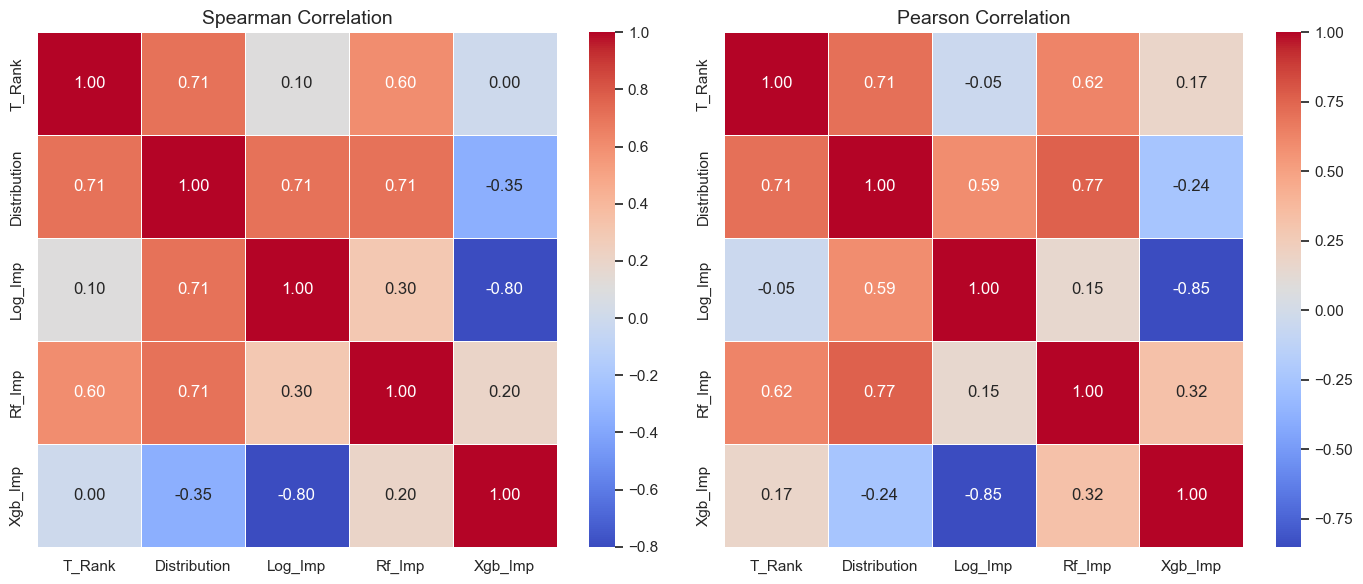

In [158]:
# Compute Spearman Correlation
spearman_corr = cor_df[['T_Rank', 'Distribution', 'Log_Imp', 'Rf_Imp', 'Xgb_Imp']].corr(method='spearman')
print("Spearman Correlation Matrix:")
print(spearman_corr)

# Compute Pearson Correlation
pearson_corr = cor_df[['T_Rank', 'Distribution', 'Log_Imp', 'Rf_Imp', 'Xgb_Imp']].corr(method='pearson')
print("\nPearson Correlation Matrix:")
print(pearson_corr)

# Plot the correlation matrices side by side for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Spearman Correlation Heatmap
sb.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, ax=axes[0])
axes[0].set_title('Spearman Correlation', fontsize=14)

# Pearson Correlation Heatmap
sb.heatmap(pearson_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, ax=axes[1])
axes[1].set_title('Pearson Correlation', fontsize=14)

# Show the plots
plt.tight_layout()
plt.show()


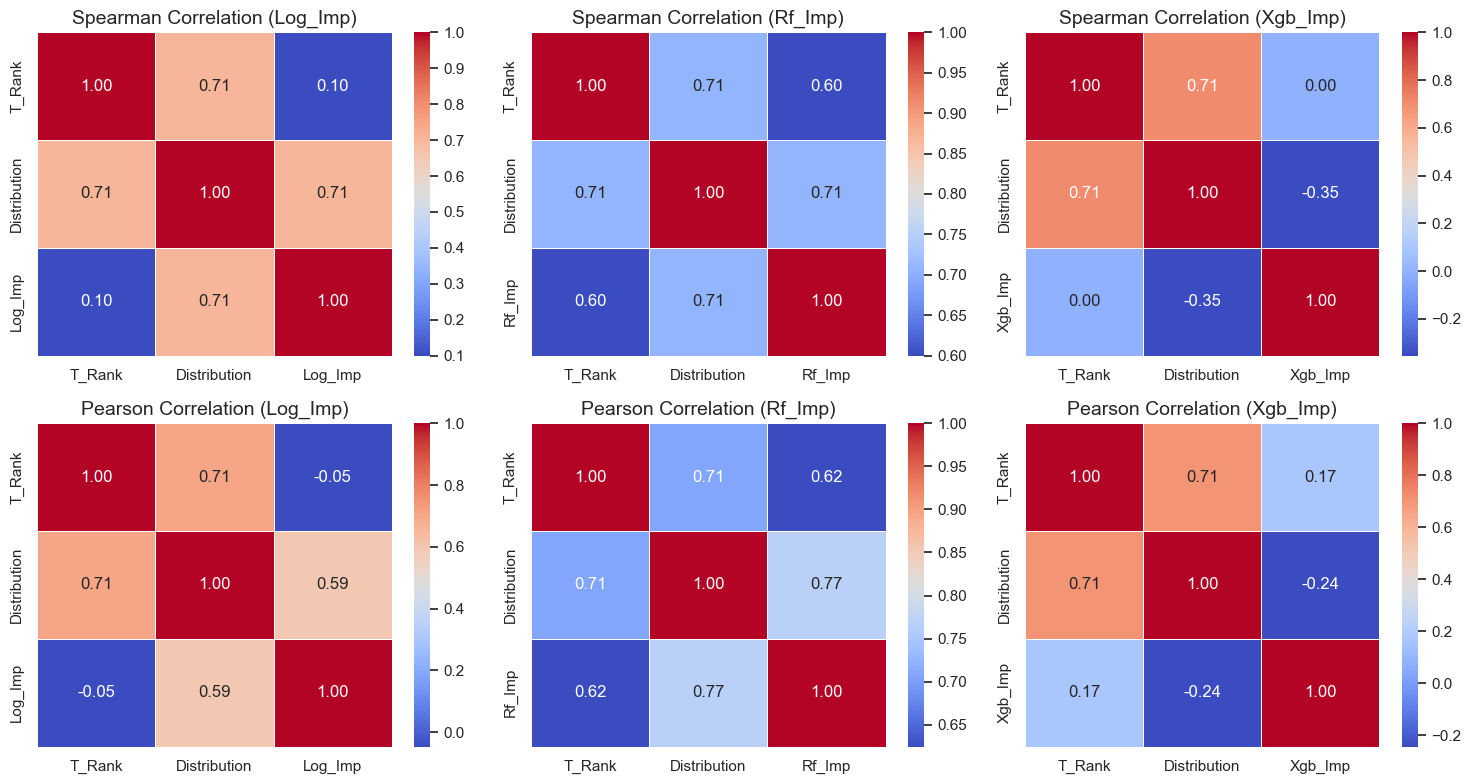

In [159]:
# Define the columns to analyze for each model
models = ['Log_Imp','Rf_Imp', 'Xgb_Imp']  # Replace 'Another_Imp' with your third model name
base_cols = ['T_Rank', 'Distribution']

# Create subplots for Pearson and Spearman heatmaps
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 2 rows, 3 columns for each model

# Loop through each model to compute correlations and plot
for i, model in enumerate(models):
    analysis_cols = base_cols + [model]  # Combine base columns with the current model
    # Pearson Correlation
    pearson_corr = cor_df[analysis_cols].corr(method='pearson')
    # Spearman Correlation
    spearman_corr = cor_df[analysis_cols].corr(method='spearman')

    # Plot Pearson correlation heatmap for the current model
    sb.heatmap(pearson_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, ax=axes[1, i])
    axes[1, i].set_title(f'Pearson Correlation ({model})', fontsize=14)
    
    # Plot Spearman correlation heatmap for the current model
    sb.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, ax=axes[0, i])
    axes[0, i].set_title(f'Spearman Correlation ({model})', fontsize=14)

# Adjust layout and display
plt.tight_layout()
plt.show()


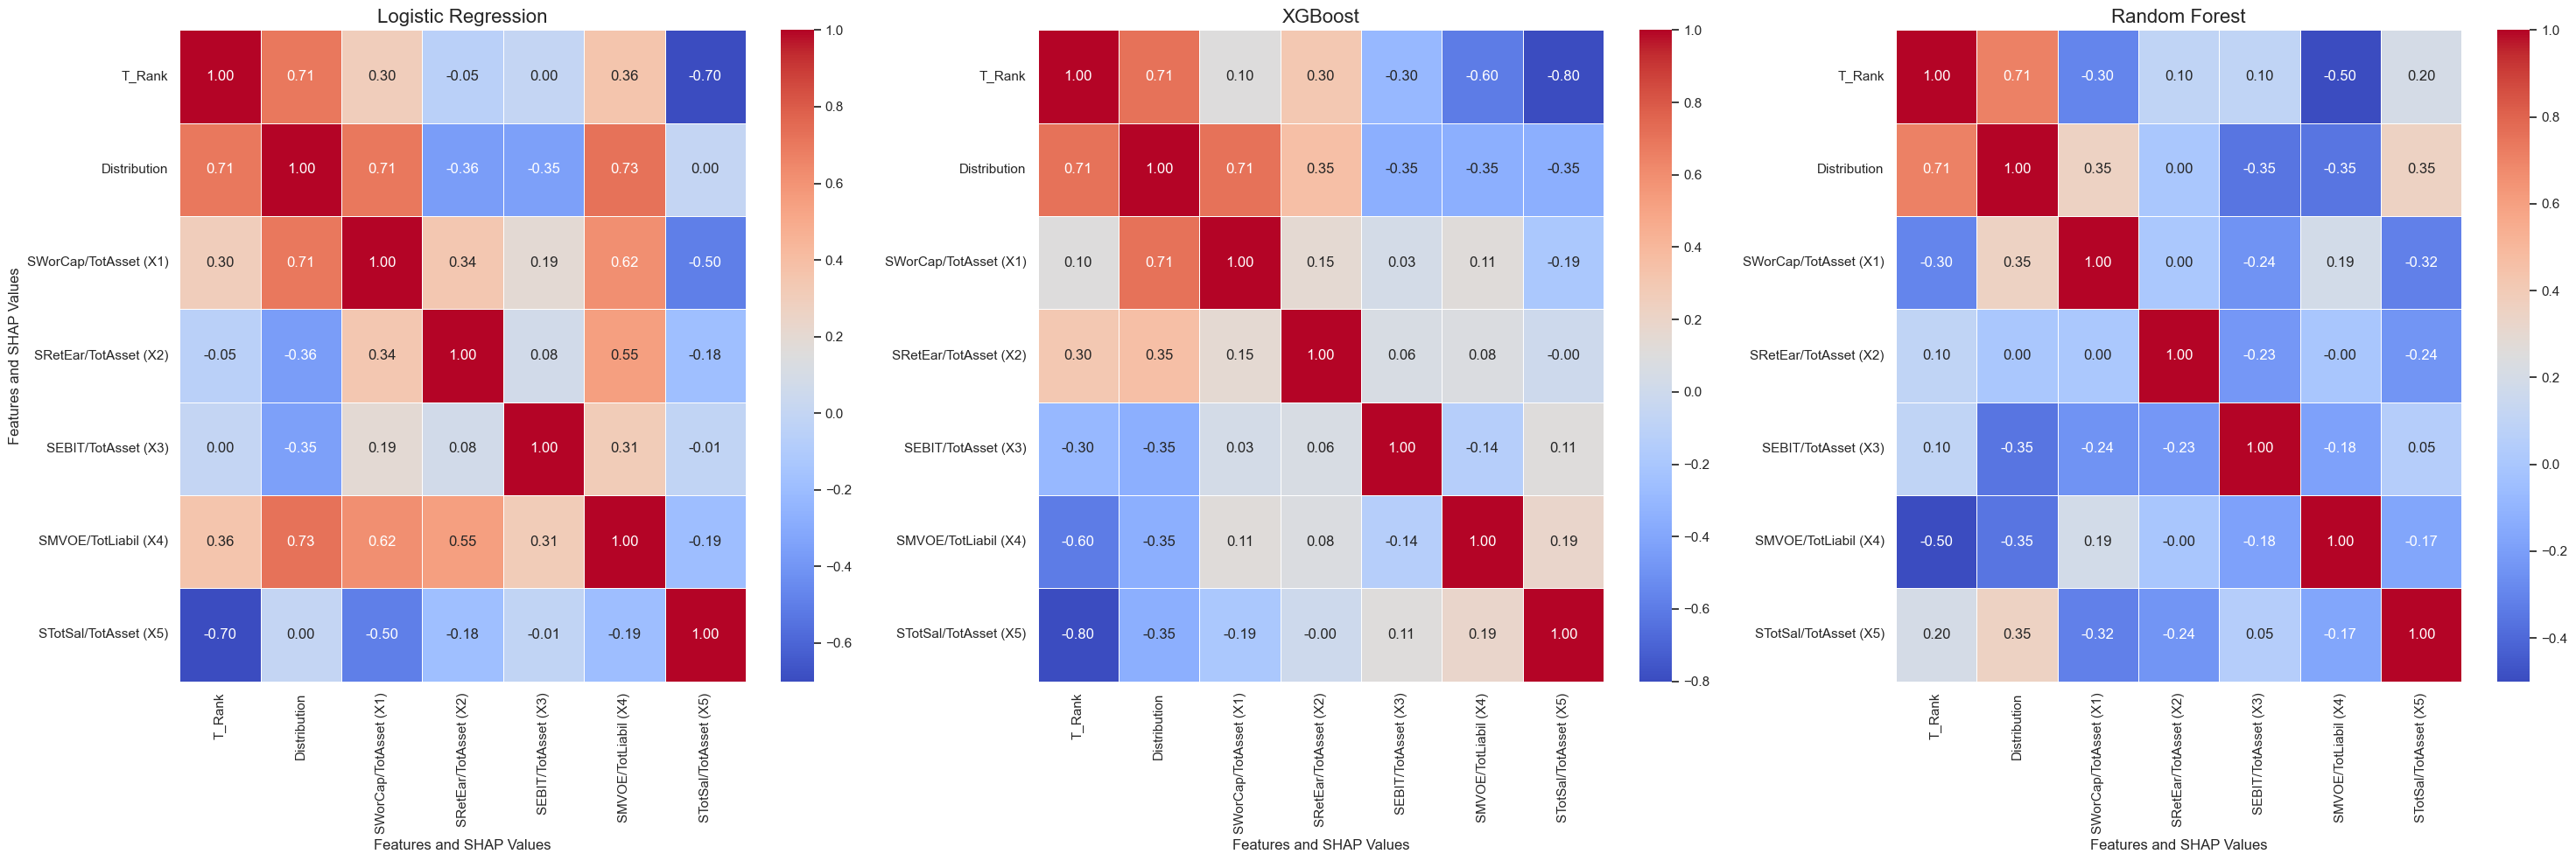

In [160]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Wide figure for three plots side by side

# ---- Logistic Regression ----
combined_df_logreg = pd.concat(
    [
        cor_df[["T_Rank", "Distribution"]],  # Add T_Rank and Distribution
        shap_values_logreg1.add_prefix("S")  # Add SHAP values
    ],
    axis=1
)
correlation_matrix_logreg = combined_df_logreg.corr(method="spearman")
sb.heatmap(
    correlation_matrix_logreg, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, ax=axes[0]
)
axes[0].set_title("Logistic Regression", fontsize=16)
axes[0].set_xlabel("Features and SHAP Values", fontsize=12)
axes[0].set_ylabel("Features and SHAP Values", fontsize=12)

# ---- XGBoost ----
combined_df_xgb = pd.concat(
    [
        cor_df[["T_Rank", "Distribution"]],  # Add T_Rank and Distribution
        shap_values_xgb1.add_prefix("S")  # Add SHAP values
    ],
    axis=1
)
correlation_matrix_xgb = combined_df_xgb.corr(method="spearman")
sb.heatmap(
    correlation_matrix_xgb, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, ax=axes[1]
)
axes[1].set_title("XGBoost", fontsize=16)
axes[1].set_xlabel("Features and SHAP Values", fontsize=12)
axes[1].set_ylabel("")

# ---- Random Forest ----
combined_df_rf = pd.concat(
    [
        cor_df[["T_Rank", "Distribution"]],  # Add T_Rank and Distribution
        shap_values_rf1.add_prefix("S")  # Add SHAP values
    ],
    axis=1
)
correlation_matrix_rf = combined_df_rf.corr(method="spearman")
sb.heatmap(
    correlation_matrix_rf, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, ax=axes[2]
)
axes[2].set_title("Random Forest", fontsize=16)
axes[2].set_xlabel("Features and SHAP Values", fontsize=12)
axes[2].set_ylabel("")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [ ]:
# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [500, 1000, 1500],  # Number of trees (you can increase it further)
    'learning_rate': [0.001, 0.01, 0.1],  # Learning rate (small learning rates may improve generalization)
    'max_depth': [5, 6, 7, 8],  # Maximum depth of trees
    'scale_pos_weight': [1, 2, 3, 4],  # Weight for the minority class
    'subsample': [0.7, 0.8, 0.9],  # Fraction of samples used for training each tree
    'colsample_bytree': [0.7, 0.8, 0.9],  # Fraction of features used for each tree
    'objective': ['binary:logitraw'],  # For binary classification with imbalanced classes
    'eval_metric': ['auc']  # AUC is a good metric for imbalanced data
}

# Initialize GridSearchCV
xgb_grid_search = GridSearchCV(XGBClassifier(random_state=42), 
                               param_grid=xgb_param_grid, 
                               scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

# Fit the GridSearchCV on training data
xgb_grid_search.fit(X_train_scaled, y_train_resampled)

# Get the best parameters found by GridSearchCV
best_params = xgb_grid_search.best_params_
print("Best parameters found by GridSearchCV:", best_params)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 500],  # Number of trees
    'max_depth': [None, 10, 20, 30],   # Depth of each tree
    'min_samples_split': [2, 5, 10],   # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for splitting a node
    'bootstrap': [True, False]         # Whether to use bootstrap samples
}

# Create the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1, scoring='f1')

# Perform the grid search on the training data
grid_search.fit(X_train_scaled, y_train_resampled)

# Print the best parameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)